## Introduction:
This case study is a real business scenario of risk analytics in banking and financial services.The aim of this case study is to identify loan defaulters and therefore reduce the risk of losing money to defaulters



## Business Objective:
The aim of the case study is to identify loan defaulters. We will use exploratory data analysis to identify patterns and segregate defaulters and non-defaulters

In other words, the company wants to understand the factors behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its risk assessment.



#### Importing the necessary libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to show the complete dataset
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

#### Preview of the data

In [2]:
app_df=pd.read_csv('Data/application_data.csv')
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
prev_df=pd.read_csv('Data/previous_application.csv')
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Column description


In [4]:
cols=pd.read_csv('Data/columns_description.csv')
cols.iloc[:,1:]


,Table,Row,Description,Special
0,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_data,CODE_GENDER,Gender of the client,NaN
4,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,application_data,AMT_ANNUITY,Loan annuity,NaN


#### Shape of the data


In [5]:
print('Shape of application_data:',app_df.shape)
print('Shape of previous_application:',prev_df.shape)

Shape of application_data: (307511, 122)
Shape of previous_application: (1670214, 37)


Application_data has 307511 records and 122 columns

Previous_application has 1670214 records and 37 columns

#### Column data types 

In [6]:
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
prev_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Statistical information of the numeric columns

In [8]:
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
prev_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### Unique values 

In [10]:
app_df.nunique()

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [11]:
prev_df.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

#### Idenfying the percentage of missing values

In [12]:
app_df.isnull().sum()/len(app_df)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [13]:
prev_df.isnull().sum()/len(prev_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

we can see that there are many columns with missing values.we will now drop the columns which has more than 40% of missing values

#### Identifying the columns with more than 40% missing values

In [14]:
null=round(app_df.isnull().sum()/len(app_df)*100)
columns1=null[null.values>=40].index
print(columns1)
print('\n')
print('Number of columns to be dropped:', len(columns1))

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [15]:
null2=round(prev_df.isnull().sum()/len(prev_df)*100)
columns2=null2[null2.values>=40].index
print(columns2)
print('\n')
print('Number of columns to be dropped:', len(columns2))

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


Number of columns to be dropped: 11


#### Dropping the columns with missing values >=40%


In [16]:
app_df=app_df.drop(columns1,axis=1)
app_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0

In [17]:
prev_df=prev_df.drop(columns2,axis=1)
prev_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,1,XAP,Approved,-544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,1,XAP,Approved,-1694,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,1,XAP,Approved,-1488,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,1,XNA,Approved,-1185,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


#### Checking for Duplicate records

In [18]:
app_df.duplicated().sum()

0

In [19]:
prev_df.duplicated().sum()

0

No duplicate records were found

#### Analyzing and deleting unecessary columns 

#### (i)Application_data

<AxesSubplot:>

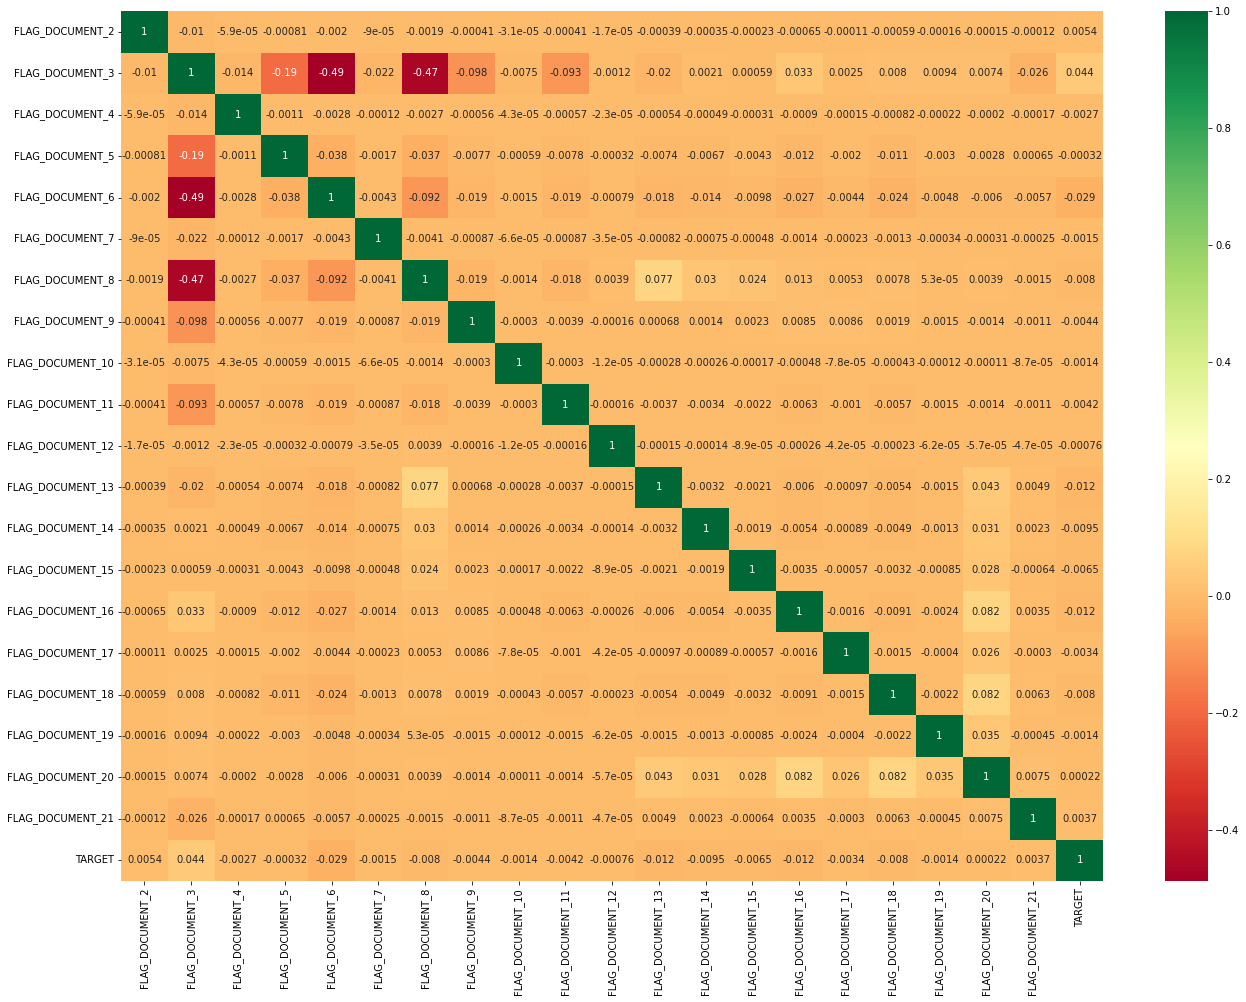

In [20]:
drop1=app_df[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
            'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
            'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
            'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','TARGET']]
plt.figure(figsize=(22,16))
sns.heatmap(drop1.corr(),annot = True,
            cmap ="RdYlGn")

we could see that the feature 'FLAG_DOCUMENT_3' is atleast 4% correlated to the target variable.Therefore we can drop the rest as they are insignificant 

<AxesSubplot:>

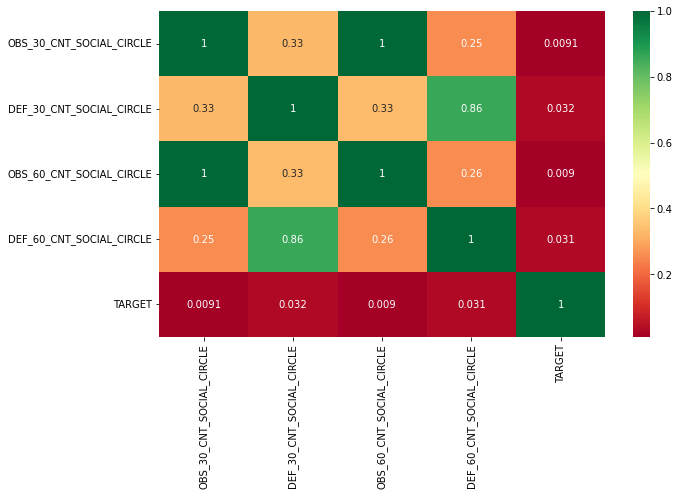

In [21]:
drop2=app_df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',   
           'OBS_60_CNT_SOCIAL_CIRCLE',
           'DEF_60_CNT_SOCIAL_CIRCLE','TARGET']]
plt.figure(figsize=(10,6))
sns.heatmap(drop2.corr(),annot=True,cmap='RdYlGn')

we can see that 'OBS_30_CNT_SOCIAL_CIRCLE' and 'OBS_60_CNT_SOCIAL_CIRCLE' are insignificant to the target variable and 'DEF_30_CNT_SOCIAL_CIRCLE' and 'DEF_60_CNT_SOCIAL_CIRCLE' are highly correlated to each other so we can drop one of them

<AxesSubplot:>

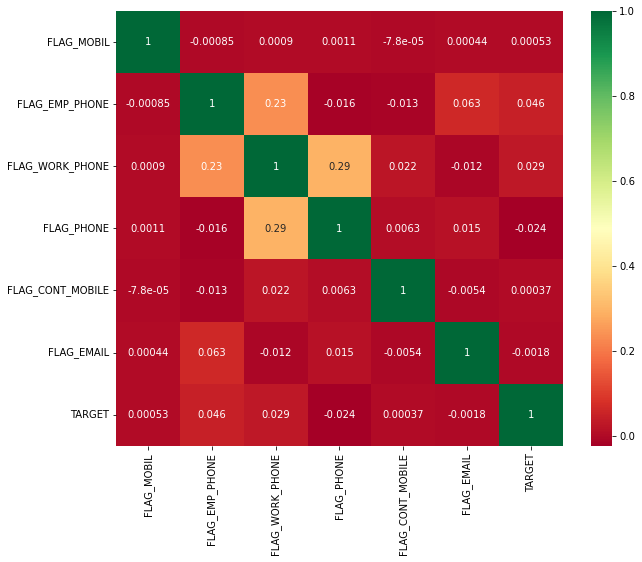

In [22]:
drop3=app_df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_CONT_MOBILE','FLAG_EMAIL','TARGET']]
plt.figure(figsize=(10,8))
sns.heatmap(drop3.corr(),annot=True,cmap='RdYlGn')


Here we will drop everything except 'FLAG_EMP_PHONE'

In [23]:
lst=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
            'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
            'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
            'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','OBS_30_CNT_SOCIAL_CIRCLE',
            'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','FLAG_MOBIL',
           'FLAG_WORK_PHONE','FLAG_PHONE','FLAG_CONT_MOBILE','FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION']
app_df=app_df.drop(labels=lst,axis=1)


#### Inspecting the column types after removal of unnecessary columns

In [24]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [25]:
app_df.shape

(307511, 43)

After deleting unnecessary columns and null columns, there are 43 columns remaining in prev_df and a total of 79 columns were deleted from app_df



#### (ii)Previous_data

In [26]:
#Listing the columns which are not needed
unnecessary = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
prev_df=prev_df.drop(labels=unnecessary,axis=1)


In [27]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

After deleting unnecessary columns and null columns, there are 22 columns remaining in prev_df and a total of 15 columns were deleted from prev_df



#### Handling the Missing values 

Strategy for Imputaion:

1.To impute null values in categorical variables, mode() is used to impute the most frequent value.

2.To impute null values in numerical variables, mean() is used if there are no outliers in the columns

3.To impute null values in numerical variables, median() is used if there are outliers present in the columns

#### (i)Application_data

In [28]:
app_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
H

#### For numeric data

###### plotting box plots to check the presence of outliers before imputation

In [29]:
#List of columns which has missing values
missing=app_df.isnull().sum()
missing=missing[missing.values>0]
data=list(missing.index)
data

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [30]:
#list of columns which is of numeric data type as box plot can be plotted only for numeric data 
x=app_df.select_dtypes(exclude=["object"]).columns
x

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

AMT_ANNUITY


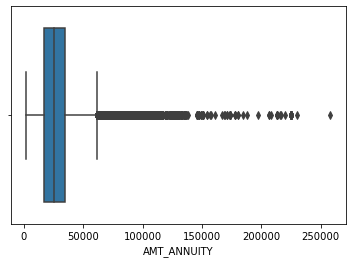

AMT_GOODS_PRICE


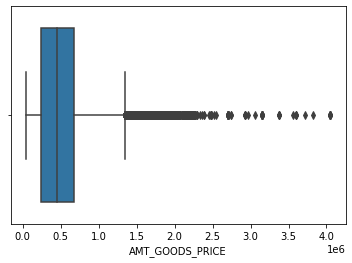

CNT_FAM_MEMBERS


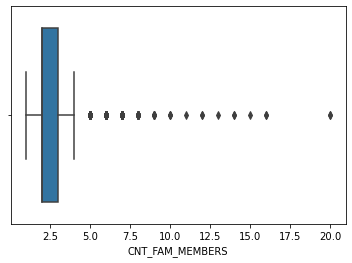

EXT_SOURCE_2


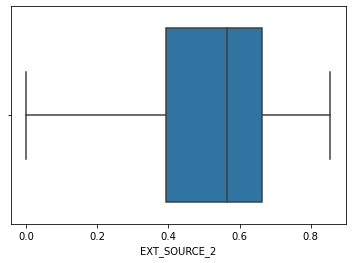

EXT_SOURCE_3


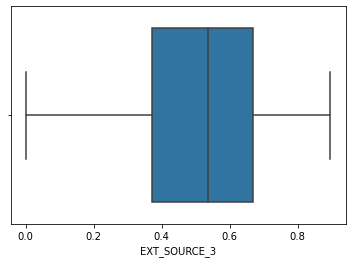

DEF_30_CNT_SOCIAL_CIRCLE


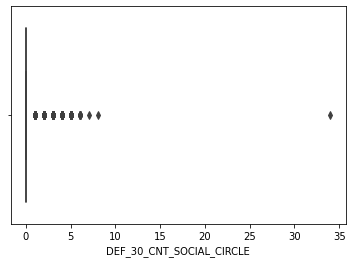

DAYS_LAST_PHONE_CHANGE


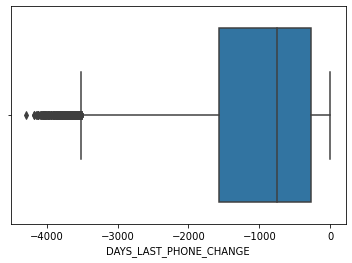

AMT_REQ_CREDIT_BUREAU_HOUR


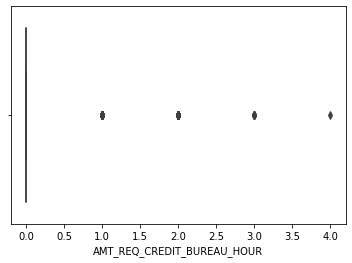

AMT_REQ_CREDIT_BUREAU_DAY


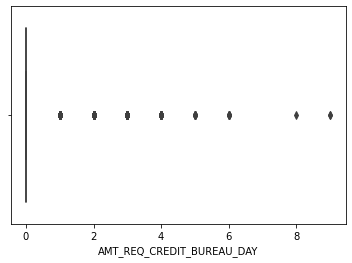

AMT_REQ_CREDIT_BUREAU_WEEK


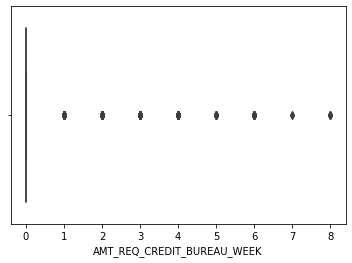

AMT_REQ_CREDIT_BUREAU_MON


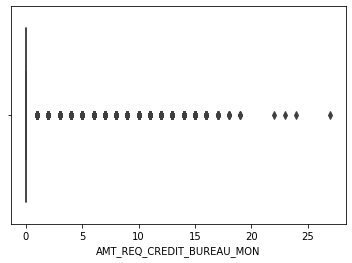

AMT_REQ_CREDIT_BUREAU_QRT


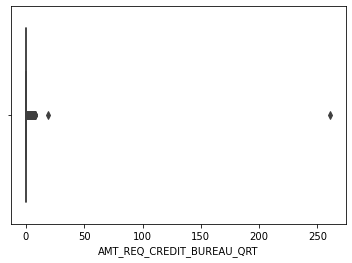

AMT_REQ_CREDIT_BUREAU_YEAR


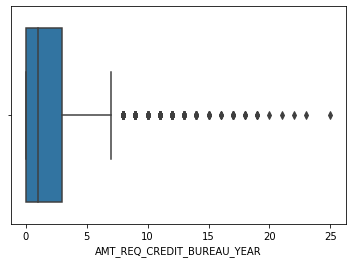

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [31]:
num=[]
for i in data:
    if i in x:
        num.append(i)
        plt.figure(i)
        print(i)
        sns.boxplot(x=app_df[i])
        plt.show()   
print(num)   

we can see that every numeric column except 'EXT_SOURCE_2' and 'EXT_SOURCE_3' has outliers present in them

In [32]:
#removing 'EXT_SOURCE_2' and 'EXT_SOURCE_3' from the list
num_outliers=['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for i in num_outliers:
    app_df[i]=app_df[i].fillna(app_df[i].median())

In [33]:
#imputing  'EXT_SOURCE_2' and 'EXT_SOURCE_3'
app_df['EXT_SOURCE_2']=app_df['EXT_SOURCE_2'].fillna(app_df['EXT_SOURCE_2'].median)
app_df['EXT_SOURCE_3']=app_df['EXT_SOURCE_3'].fillna(app_df['EXT_SOURCE_3'].median)

#### For categorical data

In [34]:
app_df['NAME_TYPE_SUITE']=app_df['NAME_TYPE_SUITE'].fillna(app_df['NAME_TYPE_SUITE'].mode()[0])
app_df['OCCUPATION_TYPE']=app_df['OCCUPATION_TYPE'].fillna(app_df['OCCUPATION_TYPE'].mode()[0])

In [35]:
app_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### checking for the unique values in categorical columns as they can have another keyword to represent the null values

In [36]:
cat=list(app_df.select_dtypes(include=['object']).columns)
cat


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

In [37]:
for i in cat:
    print(i)
    print(app_df[i].value_counts())
    print('\n')

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


FLAG_OWN_REALTY
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete

we can see that 'CODE_GENDER' and 'ORGANIZATION_TYPE' has 'XNA' as one of its values which is clearly a null value

In [38]:
app_df['ORGANIZATION_TYPE']=app_df['ORGANIZATION_TYPE'].replace('XNA',app_df['ORGANIZATION_TYPE'].mode()[0])
app_df['CODE_GENDER']=app_df['CODE_GENDER'].replace('XNA',app_df['CODE_GENDER'].mode()[0])


In [39]:
app_df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_EMP_PHONE                 0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_

All the missing values have been imputed

#### (ii)Previous_data

In [40]:
prev_df.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT               372230
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION          346
dtype: int64

#### For numeric data

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_ANNUITY'>

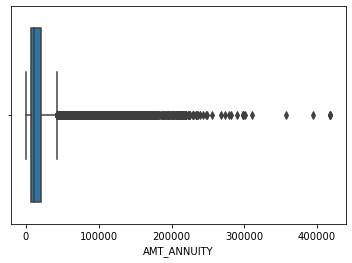

In [41]:
sns.boxplot(prev_df['AMT_ANNUITY'])

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_CREDIT'>

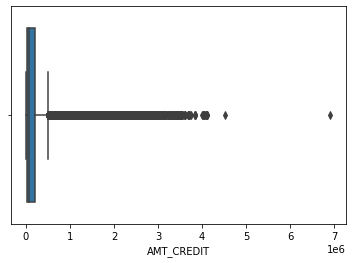

In [42]:
sns.boxplot(prev_df['AMT_CREDIT'])

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

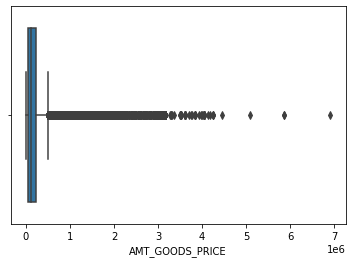

In [43]:
sns.boxplot(prev_df['AMT_GOODS_PRICE'])

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_PAYMENT'>

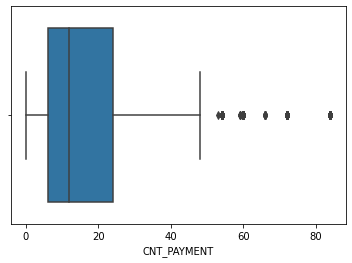

In [44]:
sns.boxplot(prev_df['CNT_PAYMENT'])

we can see that all the columns with missing values has outliers in them

In [45]:
num_outliers1=['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']
for i in num_outliers1:
    prev_df[i]=prev_df[i].fillna(prev_df[i].median())

#### For categorical data

In [46]:
prev_df['PRODUCT_COMBINATION']=prev_df['PRODUCT_COMBINATION'].fillna(prev_df['PRODUCT_COMBINATION'].mode()[0])

In [47]:
prev_df.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_ANNUITY               0
AMT_APPLICATION           0
AMT_CREDIT                0
AMT_GOODS_PRICE           0
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
DAYS_DECISION             0
NAME_PAYMENT_TYPE         0
CODE_REJECT_REASON        0
NAME_CLIENT_TYPE          0
NAME_GOODS_CATEGORY       0
NAME_PORTFOLIO            0
NAME_PRODUCT_TYPE         0
CHANNEL_TYPE              0
SELLERPLACE_AREA          0
NAME_SELLER_INDUSTRY      0
CNT_PAYMENT               0
NAME_YIELD_GROUP          0
PRODUCT_COMBINATION       0
dtype: int64

All the missing values have been imputed

#### Converting the negative columns into positive

We can see that some of the days columns are negative and days cannot be negative,so we need to convert it to positive

In [48]:
days=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for i in days:
    app_df[i]=abs(app_df[i])
    
day=['AMT_APPLICATION','DAYS_DECISION']    
for i in day:
    prev_df[i]=abs(prev_df[i])    

#### Calculating the age from 'DAYS_BIRTH'

In [49]:
app_df['Age']=app_df['DAYS_BIRTH']//365
app_df=app_df.drop(['DAYS_BIRTH'],axis=1)
app_df['Age']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: Age, Length: 307511, dtype: int64

#### Binning Numerical Columns to create a categorical column for Analysis

#### Categorizing age of Applicants

In [50]:
bins=[0,20,40,60,80,100]
label=['0-20','20-40','40-60','60-80','80+']
app_df['Age_Category']=pd.cut(app_df['Age'],bins=bins,labels=label)

In [51]:
app_df['Age_Category'].value_counts()

40-60    142220
20-40    135922
60-80     29368
0-20          1
80+           0
Name: Age_Category, dtype: int64

#### Categorizing  Total income of the Applicants

In [52]:
bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1000000000]
label=['0-100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000','600000-700000',
      '700000-800000','800000-900000','900000-100000','Above 1000000']
app_df['AMT_INCOME_RANGE']=pd.cut(app_df['AMT_INCOME_TOTAL'],bins=bins,labels=label)

In [53]:
app_df['AMT_INCOME_RANGE'].value_counts(dropna=False)

100000-200000    155898
200000-300000     65176
0-100000          63698
300000-400000     14676
400000-500000      5361
500000-600000      1095
600000-700000       869
800000-900000       298
Above 1000000       250
700000-800000       162
900000-100000        28
Name: AMT_INCOME_RANGE, dtype: int64

#### Categorizing Credit amount of the Applicants

In [54]:
bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1000000000]
label=['0-100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000','600000-700000',
      '700000-800000','800000-900000','900000-100000','Above 1000000']
app_df['AMT_CREDIT_RANGE']=pd.cut(app_df['AMT_CREDIT'],bins=bins,labels=label)

In [55]:
app_df['AMT_CREDIT_RANGE'].value_counts(dropna=False)

200000-300000    54813
Above 1000000    49985
500000-600000    34232
400000-500000    32038
100000-200000    30140
300000-400000    26338
600000-700000    24049
800000-900000    21792
700000-800000    19193
900000-100000     8927
0-100000          6004
Name: AMT_CREDIT_RANGE, dtype: int64

#### Converting categorical columns from dtype object to category 

In [56]:
cat_cols=list(app_df.select_dtypes(include='object').columns)
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

In [57]:
for i in cat_cols:
    app_df[i]=pd.Categorical(app_df[i])

In [58]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

### Identifying Outliers using Boxplot

In [59]:
#function tp plot the boxplot
def outliers(df,ind_var):
    for i in ind_var:
            print(i)
            sns.boxplot(df[i])
            plt.show()


#### For Application_Data

In [60]:
independent_var=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED',
 'DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','DEF_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR','Age']

CNT_CHILDREN


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


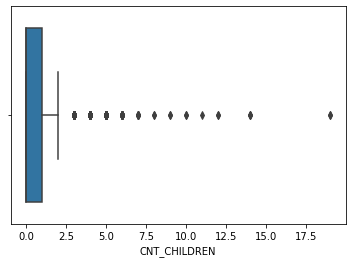

AMT_INCOME_TOTAL


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


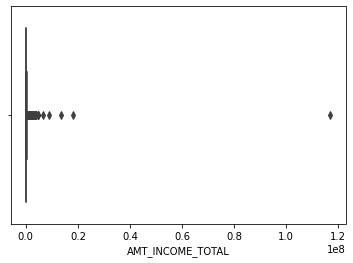

AMT_CREDIT


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


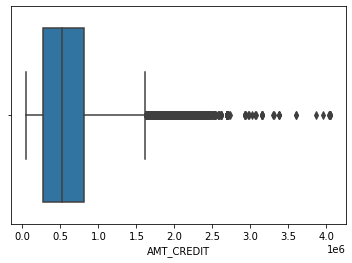

AMT_ANNUITY


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


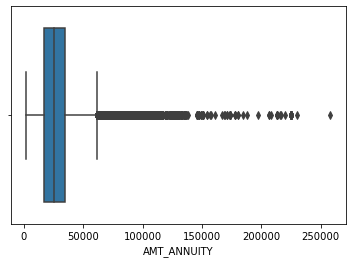

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AMT_GOODS_PRICE


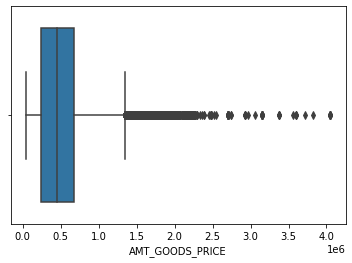

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


REGION_POPULATION_RELATIVE


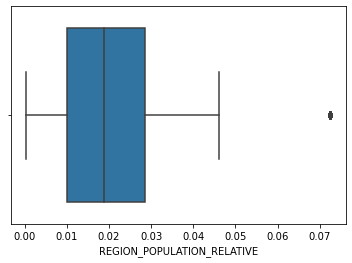

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DAYS_EMPLOYED


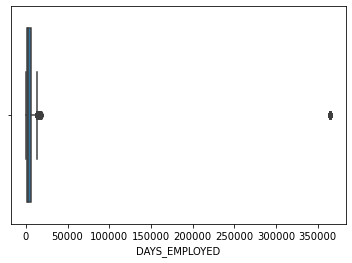

DAYS_REGISTRATION


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


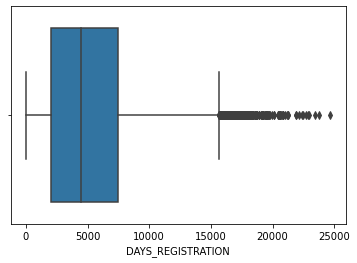

DAYS_ID_PUBLISH


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


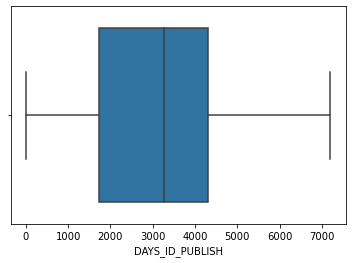

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


CNT_FAM_MEMBERS


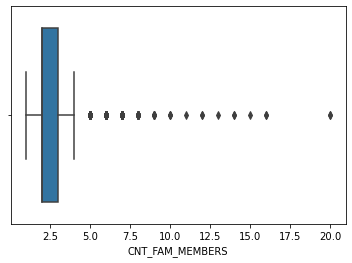

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


HOUR_APPR_PROCESS_START


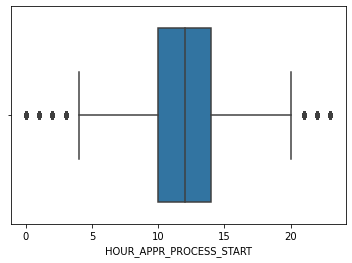

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DEF_30_CNT_SOCIAL_CIRCLE


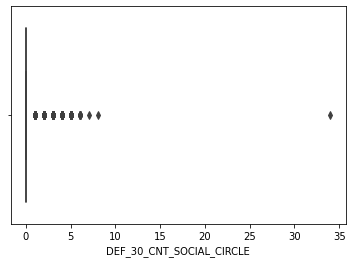

DAYS_LAST_PHONE_CHANGE


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


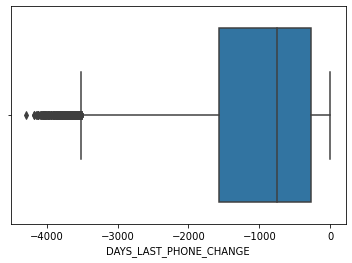

AMT_REQ_CREDIT_BUREAU_HOUR


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


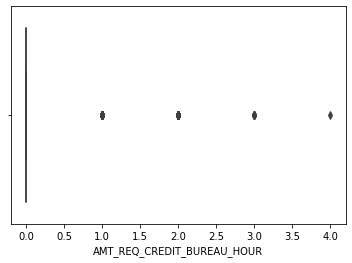

AMT_REQ_CREDIT_BUREAU_DAY


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


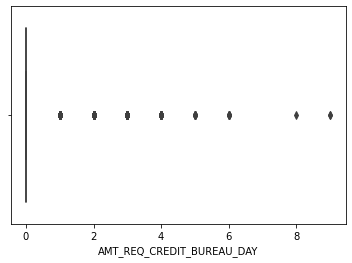

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AMT_REQ_CREDIT_BUREAU_WEEK


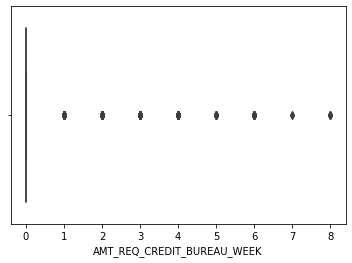

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AMT_REQ_CREDIT_BUREAU_MON


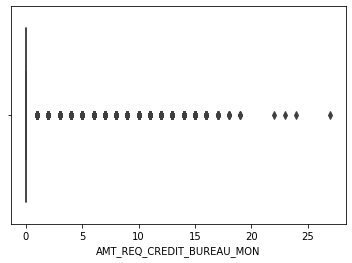

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AMT_REQ_CREDIT_BUREAU_QRT


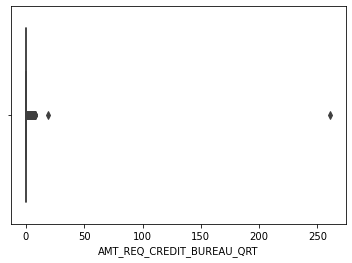

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AMT_REQ_CREDIT_BUREAU_YEAR


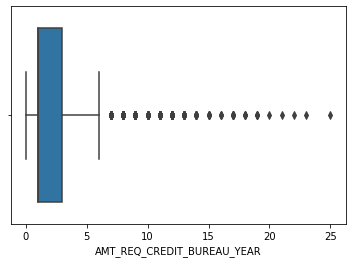

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Age


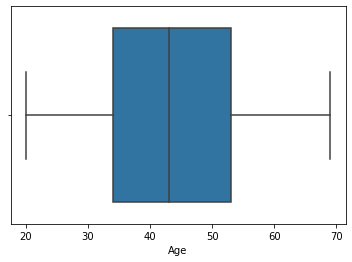

In [61]:
outliers(app_df,independent_var)

Outliers were found in many of the variables. 

CNT_CHILDREN,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR have some number of outliers.
    
AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.

Age,DAYS_ID_PUBLISH has no outliers which means the data available is reliable.

DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.

In [62]:
#column stats
app_df[independent_var].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,67724.742149,4986.120328,2994.202373,2.152664,12.063419,0.142944,-962.858119,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,43.435968
std,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,139443.751806,3522.886321,1509.450419,0.910679,3.265832,0.446033,826.807226,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,11.954593
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,933.000000,2010.000000,1720.000000,2.000000,10.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,2219.000000,4504.000000,3254.000000,2.000000,12.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,5707.000000,7479.500000,4299.000000,3.000000,14.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,365243.000000,24672.000000,7197.000000,20.000000,23.000000,34.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.000000


#### For Previous_Data

In [63]:
independent_var=list(prev_df.select_dtypes(exclude=['object','category']).columns)[2:]

AMT_ANNUITY


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


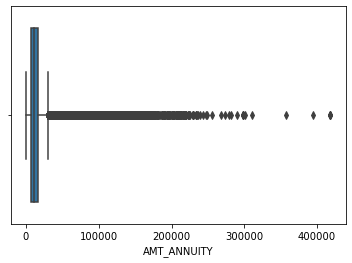

AMT_APPLICATION


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


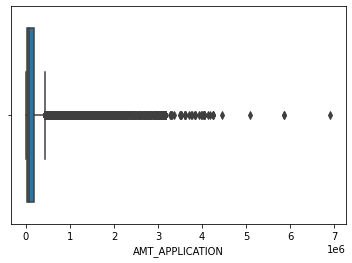

AMT_CREDIT


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


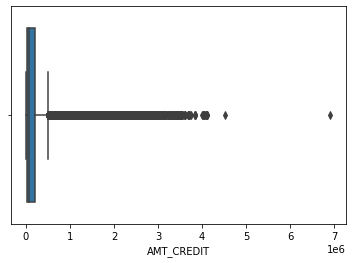

AMT_GOODS_PRICE


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


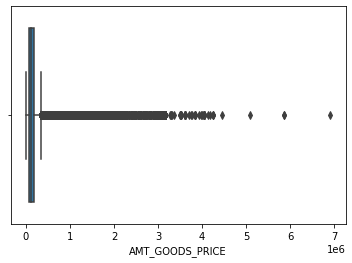

DAYS_DECISION


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


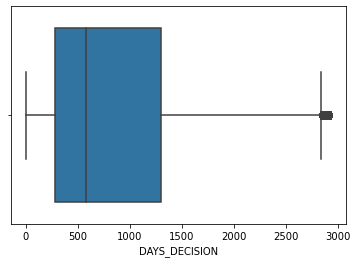

SELLERPLACE_AREA


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


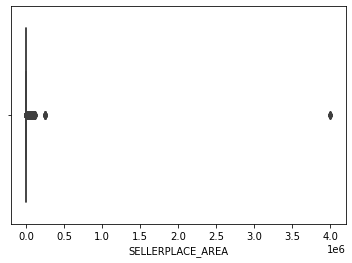

CNT_PAYMENT


C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


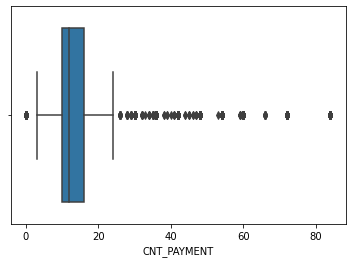

In [64]:
outliers(prev_df,independent_var)

we can see that AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.

In [65]:
#column stats
prev_df[independent_var].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.490651e+04,1.752339e+05,1.961140e+05,2.011815e+05,8.806797e+02,3.139511e+02,1.515057e+01
std,1.317751e+04,2.927798e+05,3.185745e+05,2.808629e+05,7.790997e+02,7.127443e+03,1.295220e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,7.547096e+03,1.872000e+04,2.416050e+04,6.750000e+04,2.800000e+02,-1.000000e+00,1.000000e+01
50%,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,5.810000e+02,3.000000e+00,1.200000e+01
75%,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.300000e+03,8.200000e+01,1.600000e+01
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.922000e+03,4.000000e+06,8.400000e+01


#### Checking for Imbalance in the target variable

In [66]:
app_df.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of the Target Variable')

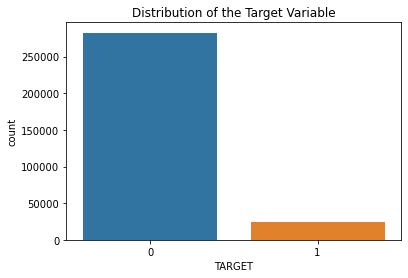

In [67]:
sns.countplot(app_df['TARGET'])
plt.title('Distribution of the Target Variable')

This is a clear case of imbalance. There are far more loans that were repaid on time than loans that were not repaid. We can see that more than 90% of the applicants are not defaulters 

### Univariate Analysis 

#### For Categorical Data

In [68]:
defaulters=app_df.loc[app_df['TARGET']==1]
non_defaulters=app_df.loc[app_df['TARGET']==0]

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

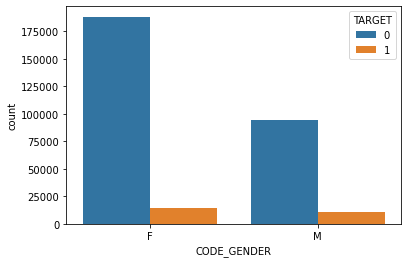

In [69]:
#Gender
sns.countplot(app_df['CODE_GENDER'],hue=app_df['TARGET'])

The plot shows that the Gender type Female has applied more than Male and that defaulters are almost equal even though one of the categories has a larger number of application than the other 

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

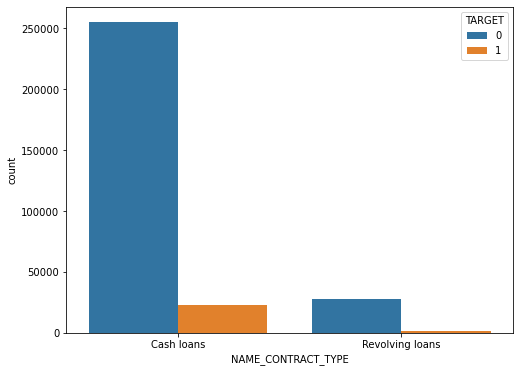

In [70]:
#Loan Type
plt.figure(figsize=(8,6))
sns.countplot(app_df['NAME_CONTRACT_TYPE'],hue=app_df['TARGET'])

We can observe that the number of Cash loans is much higher than the number of Revolving loans and the number of defaulters are also high in cash loans 

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FLAG_OWN_CAR', ylabel='count'>

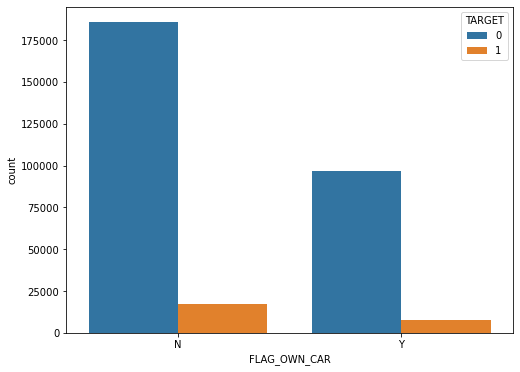

In [71]:
#FLAG_OWN_CAR
plt.figure(figsize=(8,6))
sns.countplot(app_df['FLAG_OWN_CAR'],hue=app_df['TARGET'])

We could observe that most of the applicants do not own a car and the ratio of defaulters are also high in the applicants who do not own a car

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='count'>

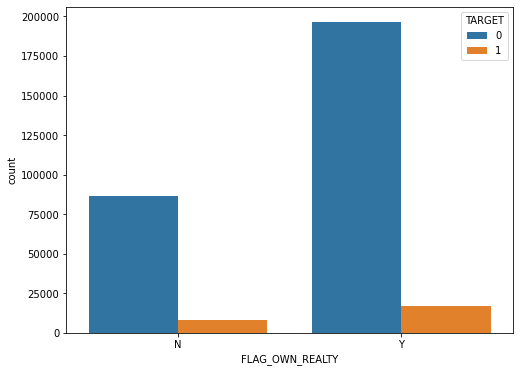

In [72]:
#FLAG_OWN_REALTY
plt.figure(figsize=(8,6))
sns.countplot(app_df['FLAG_OWN_REALTY'],hue=app_df['TARGET'])

We could observe that most of the applicants do own Realty

Text(0.5, 1.0, 'Defaulters')

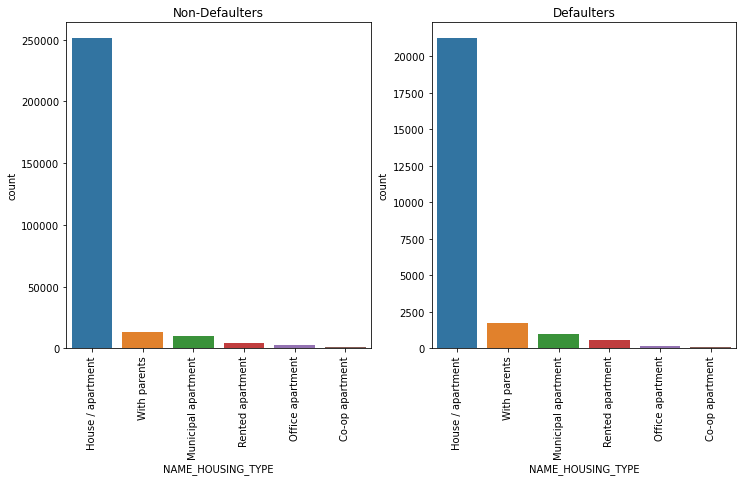

In [73]:
#Housing Type i.e living situation of the applicants
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(data=non_defaulters,x=non_defaulters['NAME_HOUSING_TYPE'],order=non_defaulters['NAME_HOUSING_TYPE'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')

plt.subplot(1,2,2)
sns.countplot(data=defaulters,x=defaulters['NAME_HOUSING_TYPE'],order=defaulters['NAME_HOUSING_TYPE'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Defaulters')

Most people live in a House/Apartment and people living in Office apartments and Co-op apartment have lowest default rate.


Text(0.5, 1.0, 'Defaulters')

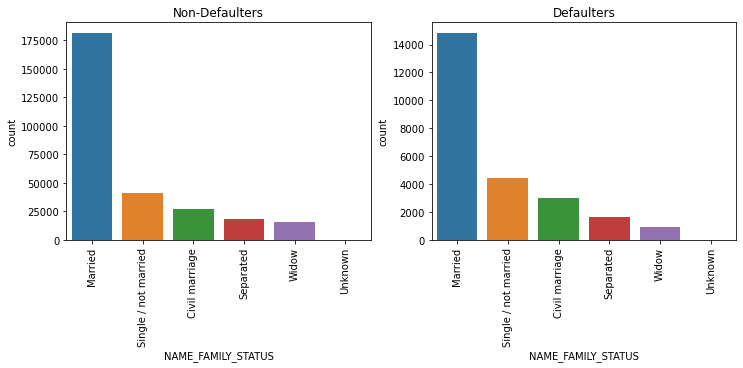

In [74]:
#Family Status
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=non_defaulters,x=non_defaulters['NAME_FAMILY_STATUS'],order=non_defaulters['NAME_FAMILY_STATUS'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(data=defaulters,x=defaulters['NAME_FAMILY_STATUS'],order=defaulters['NAME_FAMILY_STATUS'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Defaulters')


We can observe that married people have taken the most number of loans and the defaulters are also high in the same category,followed by Single/not married and civil marriage


Text(0.5, 1.0, 'Defaulters')

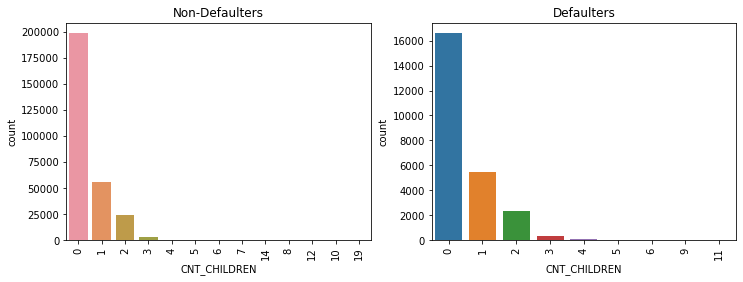

In [75]:
#Number of Children 
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=non_defaulters,x=non_defaulters['CNT_CHILDREN'],order=non_defaulters['CNT_CHILDREN'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(data=defaulters,x=defaulters['CNT_CHILDREN'],order=defaulters['CNT_CHILDREN'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Defaulters')


Text(0.5, 1.0, 'Defaulters')

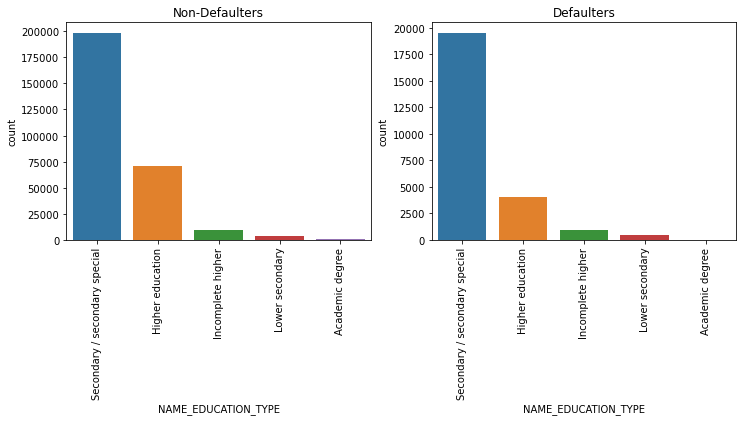

In [76]:
#Education Type
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=non_defaulters,x=non_defaulters['NAME_EDUCATION_TYPE'],order=non_defaulters['NAME_EDUCATION_TYPE'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(data=defaulters,x=defaulters['NAME_EDUCATION_TYPE'],order=defaulters['NAME_EDUCATION_TYPE'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Defaulters')

Majority of the clients have Secondary / secondary special education, followed by Higher education. Only a very small number of applicants have an academic degree. We can see that people with an Academic degree have rarely taken loans and they are not likely to be a defaulter

Text(0.5, 1.0, 'Defaulters')

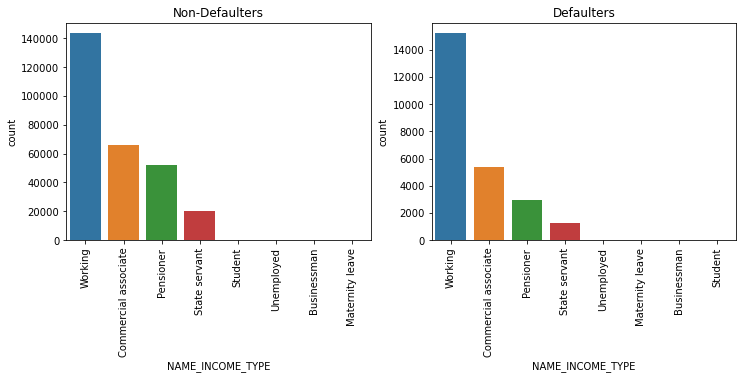

In [77]:
#Income Type
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=non_defaulters,x=non_defaulters['NAME_INCOME_TYPE'],order=non_defaulters['NAME_INCOME_TYPE'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(data=defaulters,x=defaulters['NAME_INCOME_TYPE'],order=defaulters['NAME_INCOME_TYPE'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Defaulters')

Working class have taken the more number of loans

Text(0.5, 1.0, 'Defaulters')

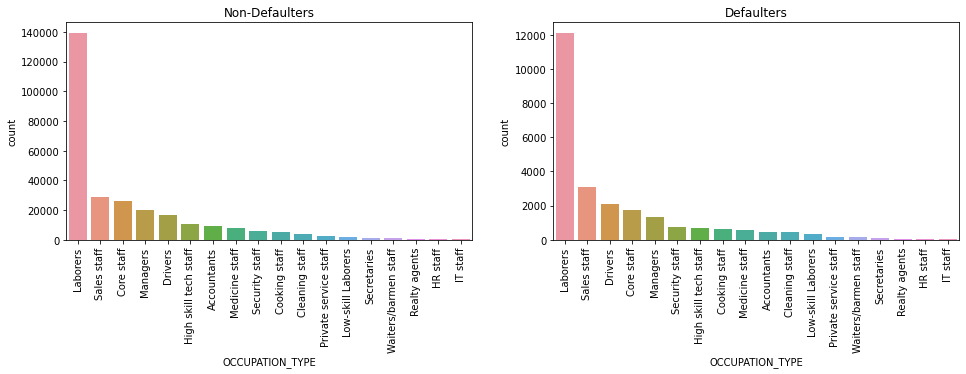

In [78]:
#Occupation type
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(data=non_defaulters,x=non_defaulters['OCCUPATION_TYPE'],order=non_defaulters['OCCUPATION_TYPE'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(data=defaulters,x=defaulters['OCCUPATION_TYPE'],order=defaulters['OCCUPATION_TYPE'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Defaulters')

Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.

Text(0.5, 1.0, 'Non-Defaulters')

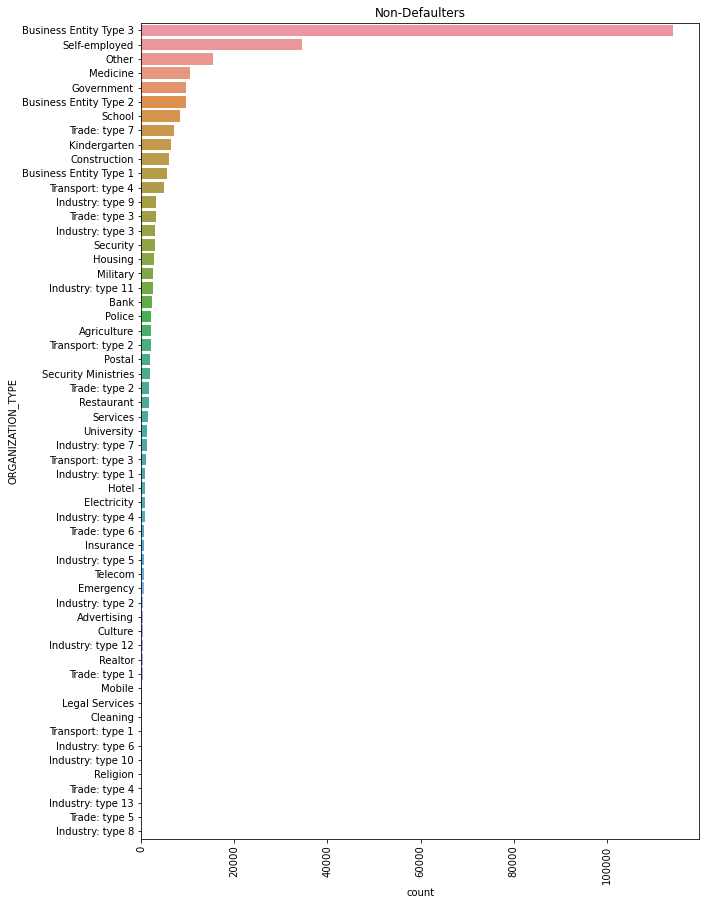

In [79]:
#Organization type
plt.figure(figsize=(10,15))
sns.countplot(data=non_defaulters,y=non_defaulters['ORGANIZATION_TYPE'],order=non_defaulters['ORGANIZATION_TYPE'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')


Text(0.5, 1.0, 'Defaulters')

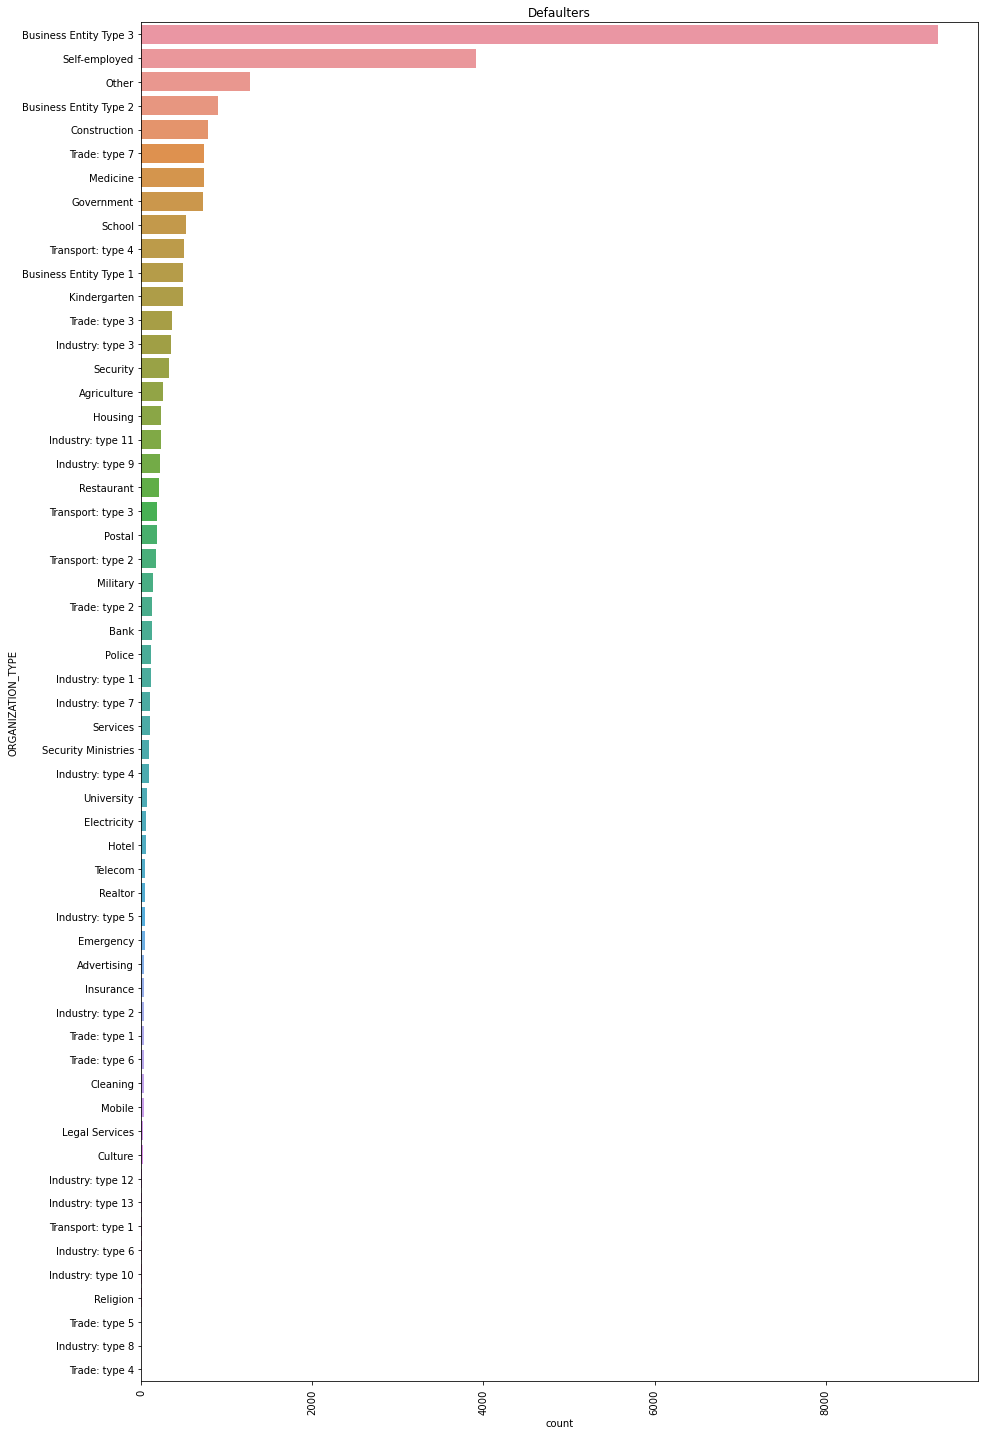

In [80]:
plt.figure(figsize=(15,25))
sns.countplot(data=defaulters,y=defaulters['ORGANIZATION_TYPE'],order=defaulters['ORGANIZATION_TYPE'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Defaulters')

Text(0.5, 1.0, 'Defaulters')

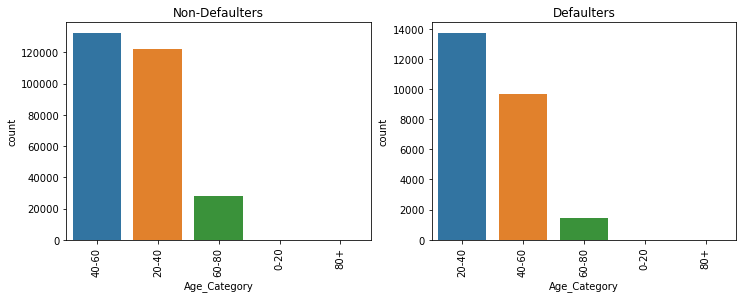

In [81]:
#Age Category
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=non_defaulters,x=non_defaulters['Age_Category'],order=non_defaulters['Age_Category'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(data=defaulters,x=defaulters['Age_Category'],order=defaulters['Age_Category'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Defaulters')

We can observe that the most number of defaulters are between the ages of 20 to 40 and the people above 60 are less likely to be a defaulter

Text(0.5, 1.0, 'Defaulters')

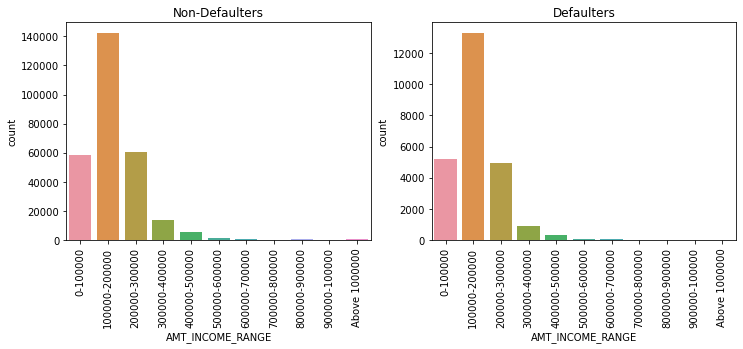

In [82]:
#Income Range
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=non_defaulters,x=non_defaulters['AMT_INCOME_RANGE'])
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(data=defaulters,x=defaulters['AMT_INCOME_RANGE'])
plt.xticks(rotation='vertical')
plt.title('Defaulters')

Most of the applicants have an income ranging between 100k to 200k and people with high income are least likely to be defaulters

Text(0.5, 1.0, 'Defaulters')

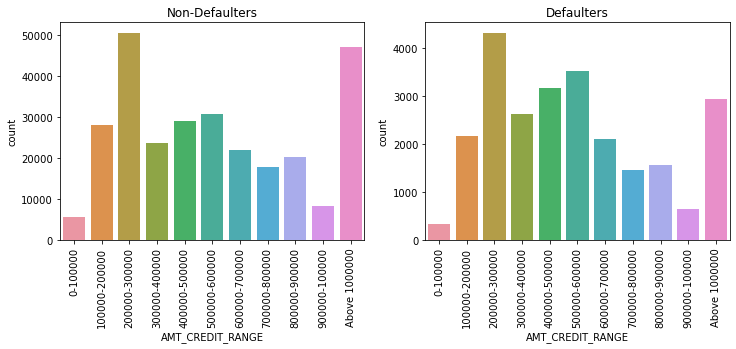

In [83]:
#Amount Credit
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=non_defaulters,x=non_defaulters['AMT_CREDIT_RANGE'])
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(data=defaulters,x=defaulters['AMT_CREDIT_RANGE'])
plt.xticks(rotation='vertical')
plt.title('Defaulters')


People who got loan for 300-600k tend to be defaulters more than the others.

#### For Numerical Data

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'AMT_INCOME_TOTAL')

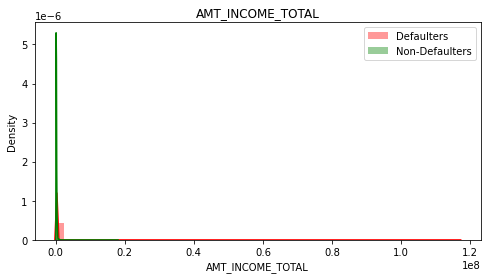

In [84]:
plt.figure(figsize=(8,4))
sns.distplot(defaulters['AMT_INCOME_TOTAL'],color='r',label='Defaulters')
sns.distplot(non_defaulters['AMT_INCOME_TOTAL'],color='g',label='Non-Defaulters')
plt.legend()
plt.title('AMT_INCOME_TOTAL')

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'AMT_CREDIT')

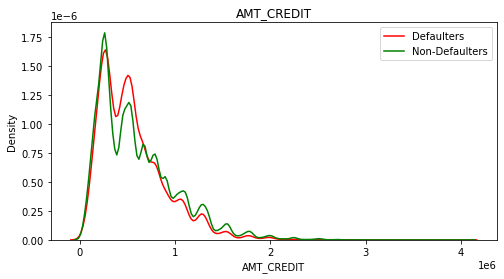

In [85]:
plt.figure(figsize=(8,4))
sns.distplot(defaulters['AMT_CREDIT'],color='r',hist=False,label='Defaulters')
sns.distplot(non_defaulters['AMT_CREDIT'],color='g',hist=False,label='Non-Defaulters')
plt.legend()
plt.title('AMT_CREDIT')

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'AMT_ANNUITY')

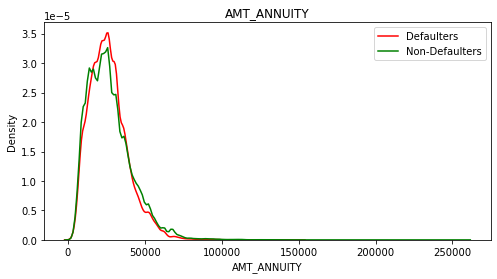

In [86]:
plt.figure(figsize=(8,4))
sns.distplot(defaulters['AMT_ANNUITY'],color='r',hist=False,label='Defaulters')
sns.distplot(non_defaulters['AMT_ANNUITY'],color='g',hist=False,label='Non-Defaulters')
plt.legend()
plt.title('AMT_ANNUITY')

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'AMT_GOODS_PRICE')

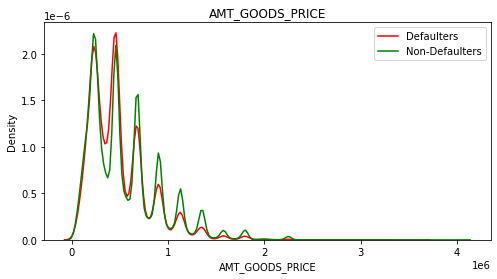

In [87]:
plt.figure(figsize=(8,4))
sns.distplot(defaulters['AMT_GOODS_PRICE'],color='r',hist=False,label='Defaulters')
sns.distplot(non_defaulters['AMT_GOODS_PRICE'],color='g',hist=False,label='Non-Defaulters')
plt.legend()
plt.title('AMT_GOODS_PRICE')

C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASHOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

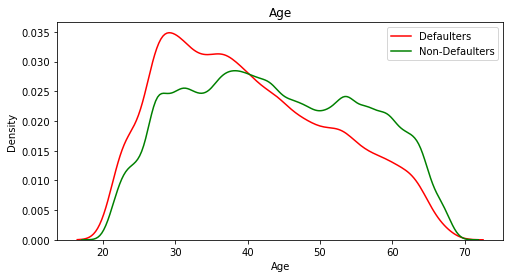

In [88]:
plt.figure(figsize=(8,4))
sns.distplot(defaulters['Age'],color='r',hist=False,label='Defaulters')
sns.distplot(non_defaulters['Age'],color='g',hist=False,label='Non-Defaulters')
plt.legend()
plt.title('Age')

The non-defaulters and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

### Bivariate/Multivariate Analyis

Text(0.5, 1.0, 'Income Type Vs Total Income')

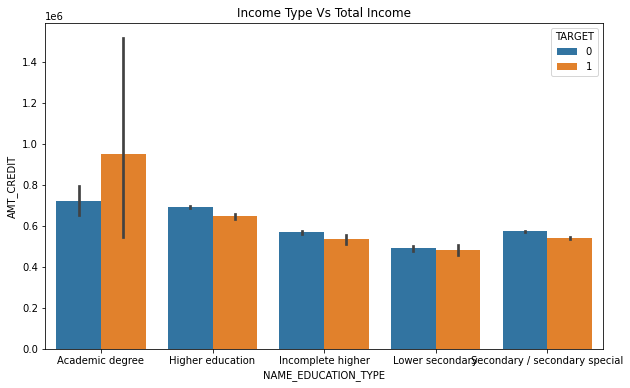

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=app_df,hue='TARGET')
plt.title('Income Type Vs Total Income')

People with an Academic Degree have asked for the largest credit amount  

Text(0.5, 1.0, 'Income Type Vs Total Income')

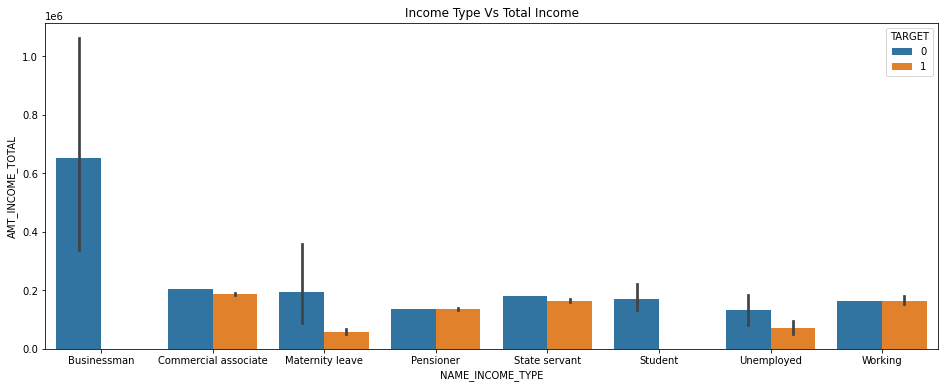

In [90]:
plt.figure(figsize=(16,6))
sns.barplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',data=app_df,hue='TARGET')
plt.title('Income Type Vs Total Income')

Businessman has the highest income and the working category has the lowest income

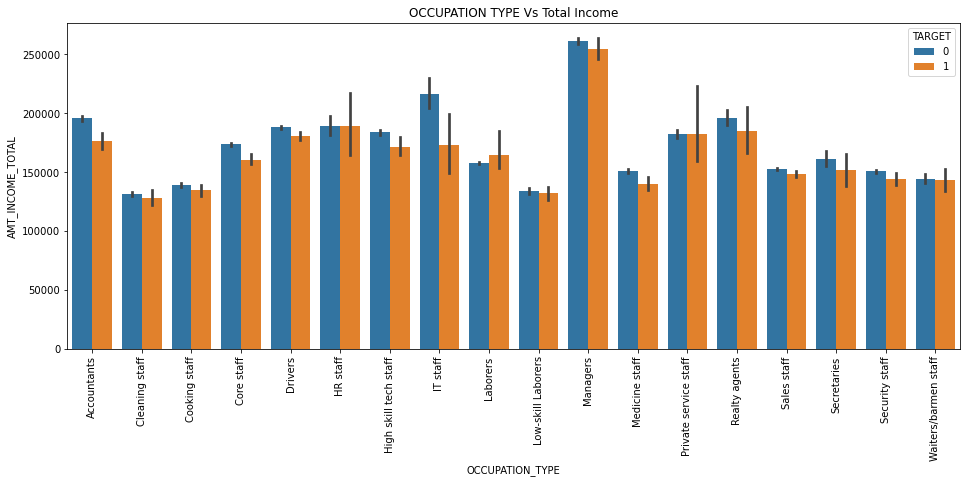

In [91]:
plt.figure(figsize=(16,6))
plt.title('OCCUPATION TYPE Vs Total Income')
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',data=app_df,hue='TARGET')
plt.xticks(rotation='vertical')
plt.show()

Managers have the highest income and Cleaning staff,cooking staff,Low-skill Laborers have the lowest income

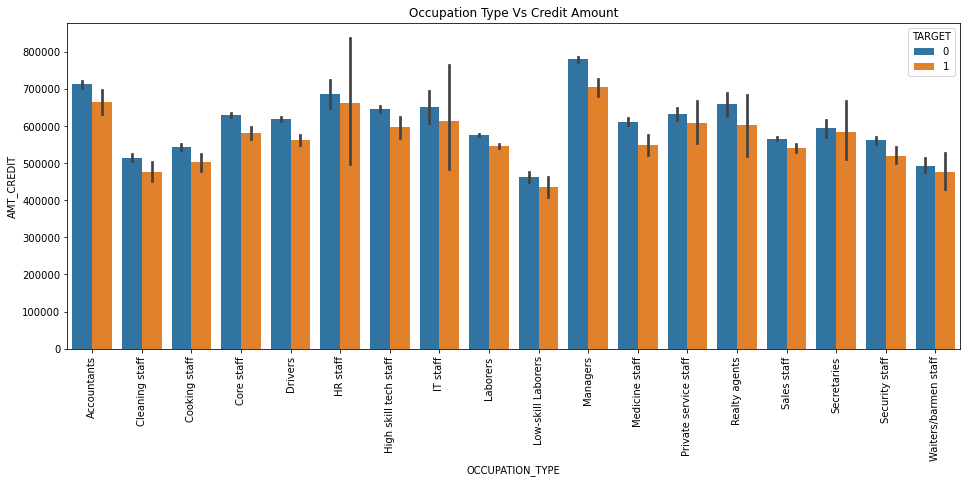

In [92]:
plt.figure(figsize=(16,6))
plt.title('Occupation Type Vs Credit Amount')
sns.barplot(x='OCCUPATION_TYPE',y='AMT_CREDIT',data=app_df,hue='TARGET')
plt.xticks(rotation='vertical')
plt.show()

Managers and Accountants are having more credit amount and Low credit amount are for Low-skill Laborers

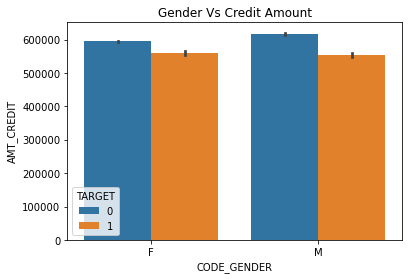

In [93]:
plt.title('Gender Vs Credit Amount')
sns.barplot(x='CODE_GENDER',y='AMT_CREDIT',data=app_df,hue='TARGET')
plt.show()

Gender Type Female has more credit than the male type

### Correlation Analysis

#### Correlation for Non-Defaulters

In [94]:
corr1=non_defaulters.iloc[:,2:]
corr1=corr1.select_dtypes(exclude=['category','object']).corr()
corr1=round(corr1, 3)
corr1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
CNT_CHILDREN,1.000,0.027,0.003,0.021,-0.001,-0.024,-0.245,-0.186,0.029,0.244,0.879,0.023,0.022,-0.005,0.022,0.072,0.071,-0.002,-0.009,0.056,0.000,0.001,-0.000,-0.008,-0.004,-0.036,-0.337
AMT_INCOME_TOTAL,0.027,1.000,0.343,0.419,0.349,0.168,-0.140,-0.065,-0.023,0.141,0.034,-0.187,-0.200,0.077,0.011,0.018,0.021,-0.028,-0.041,-0.039,0.003,0.008,0.009,0.059,0.018,0.034,-0.062
AMT_CREDIT,0.003,0.343,1.000,0.771,0.987,0.101,-0.070,-0.013,0.001,0.071,0.065,-0.103,-0.112,0.054,-0.025,-0.016,0.003,-0.019,-0.070,0.100,-0.002,0.005,0.001,0.055,0.022,-0.038,0.047
AMT_ANNUITY,0.021,0.419,0.771,1.000,0.776,0.121,-0.105,-0.039,-0.014,0.106,0.076,-0.132,-0.145,0.054,-0.006,0.002,0.011,-0.022,-0.062,0.103,0.003,0.002,0.012,0.036,0.012,-0.008,-0.012
AMT_GOODS_PRICE,-0.001,0.349,0.987,0.776,1.000,0.104,-0.069,-0.016,0.004,0.070,0.063,-0.104,-0.113,0.063,-0.025,-0.017,0.001,-0.021,-0.071,0.080,-0.002,0.006,0.001,0.057,0.022,-0.040,0.045
REGION_POPULATION_RELATIVE,-0.024,0.168,0.101,0.121,0.104,1.000,-0.007,0.052,0.001,0.007,-0.023,-0.539,-0.537,0.173,-0.048,-0.042,-0.014,0.005,-0.041,-0.086,-0.002,0.002,-0.003,0.071,-0.002,0.000,0.025
DAYS_EMPLOYED,-0.245,-0.140,-0.070,-0.105,-0.069,-0.007,1.000,0.215,0.277,-1.000,-0.238,0.038,0.040,-0.095,-0.093,-0.258,-0.221,0.019,0.023,-0.245,-0.004,-0.001,0.002,-0.033,0.013,0.047,0.626
DAYS_REGISTRATION,-0.186,-0.065,-0.013,-0.039,-0.016,0.052,0.215,1.000,0.100,-0.212,-0.176,-0.076,-0.069,0.008,-0.064,-0.099,-0.072,-0.001,-0.054,-0.032,0.003,0.000,0.001,0.011,0.000,0.024,0.333
DAYS_ID_PUBLISH,0.029,-0.023,0.001,-0.014,0.004,0.001,0.277,0.100,1.000,-0.275,0.020,0.009,0.012,-0.034,-0.075,-0.100,-0.062,-0.000,-0.083,-0.050,-0.002,0.002,0.007,0.017,0.017,0.048,0.271
FLAG_EMP_PHONE,0.244,0.141,0.071,0.106,0.070,0.007,-1.000,-0.212,-0.275,1.000,0.238,-0.038,-0.040,0.095,0.091,0.256,0.220,-0.019,-0.025,0.245,0.004,0.001,-0.002,0.033,-0.013,-0.047,-0.622


#### Top 10 correlated numerical variables


In [95]:
corr1[corr1<=0.99].unstack().sort_values(ascending=False).drop_duplicates().head(10)

AMT_CREDIT                   AMT_GOODS_PRICE           0.987
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT      0.950
CNT_FAM_MEMBERS              CNT_CHILDREN              0.879
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY    0.830
AMT_GOODS_PRICE              AMT_ANNUITY               0.776
AMT_ANNUITY                  AMT_CREDIT                0.771
Age                          DAYS_EMPLOYED             0.626
REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_LIVE_CITY    0.436
AMT_ANNUITY                  AMT_INCOME_TOTAL          0.419
AMT_GOODS_PRICE              AMT_INCOME_TOTAL          0.349
dtype: float64

#### Correlation Matrix

<AxesSubplot:>

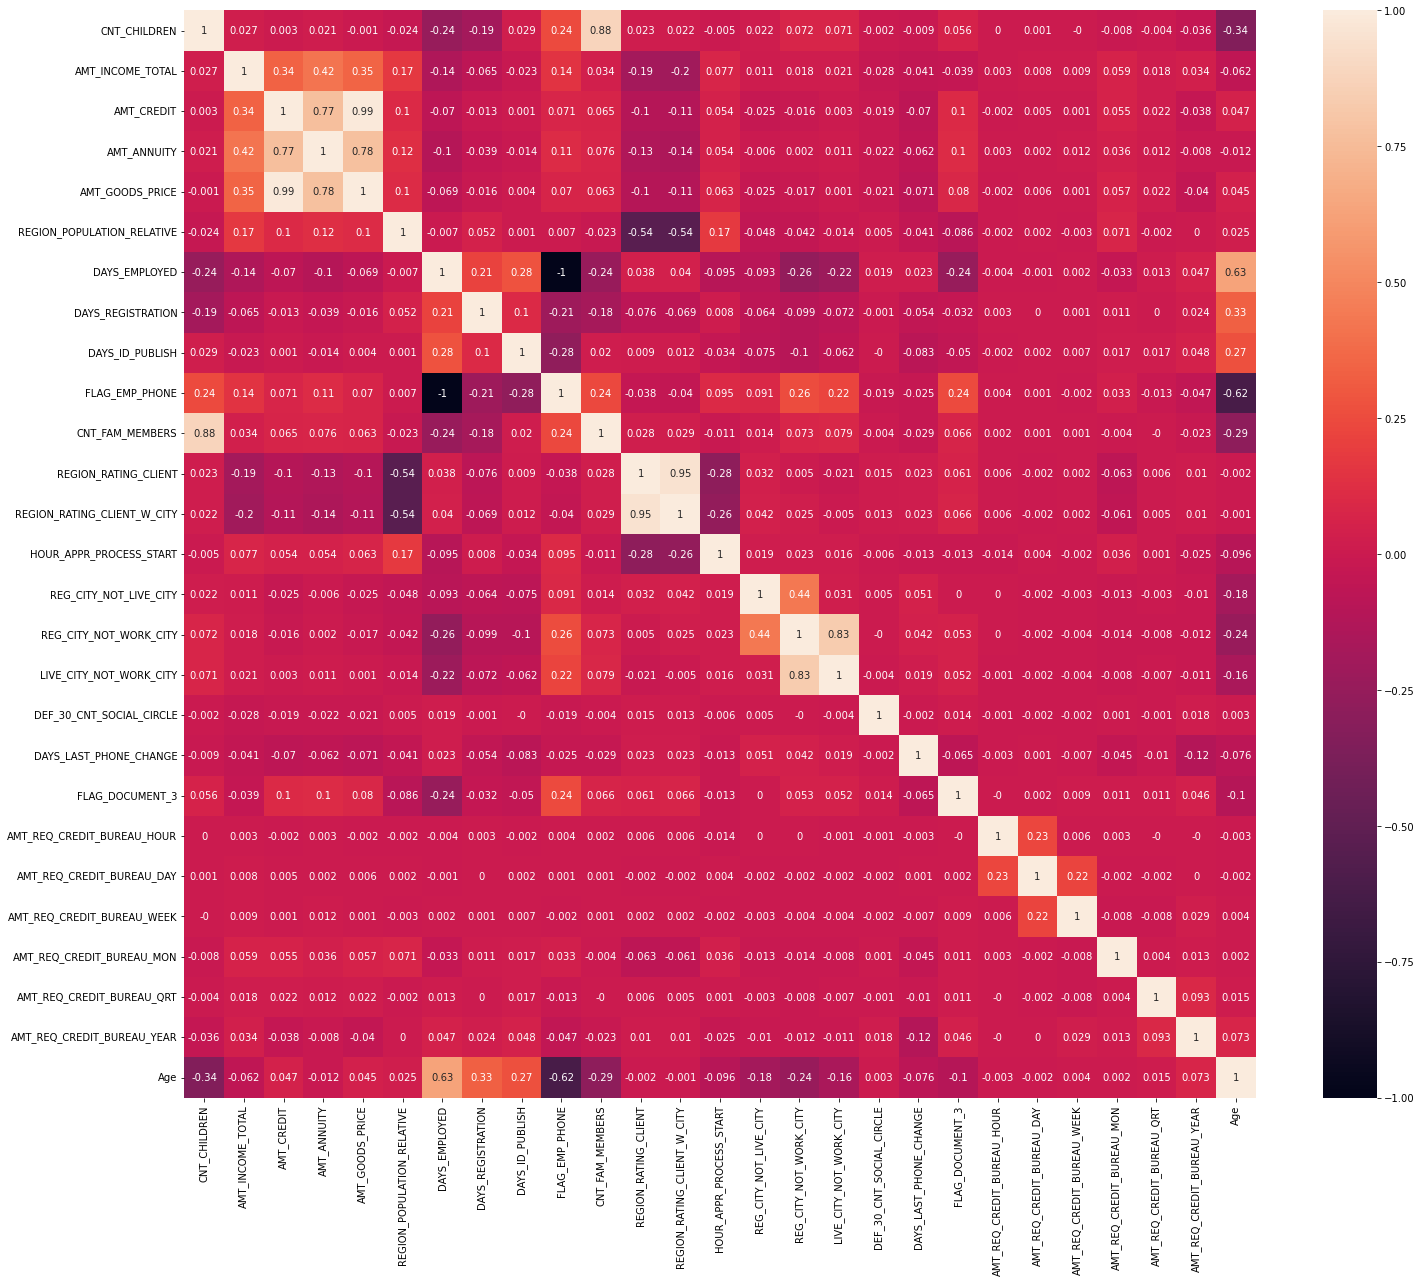

In [96]:
plt.figure(figsize=(24,20))
sns.heatmap(corr1,annot=True)

#### Correlation for Defaulters 

In [97]:
corr2=defaulters.iloc[:,2:]
corr2=corr2.select_dtypes(exclude=['category','object']).corr()
corr2=round(corr2, 3)
corr2

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
CNT_CHILDREN,1.000,0.005,-0.002,0.031,-0.008,-0.032,-0.193,-0.149,0.032,0.192,0.885,0.041,0.043,-0.024,-0.001,0.046,0.054,0.002,0.012,0.061,0.000,-0.011,-0.009,-0.009,-0.013,-0.027,-0.259
AMT_INCOME_TOTAL,0.005,1.000,0.038,0.046,0.038,0.009,-0.015,-0.000,0.004,0.015,0.007,-0.021,-0.023,0.014,-0.002,-0.003,-0.001,-0.005,-0.002,0.001,0.001,0.000,0.001,0.006,0.001,0.005,-0.003
AMT_CREDIT,-0.002,0.038,1.000,0.752,0.983,0.069,0.002,0.026,0.052,-0.001,0.051,-0.059,-0.071,0.032,-0.033,-0.038,-0.017,-0.026,-0.111,0.062,-0.004,0.004,0.011,0.056,-0.007,-0.021,0.135
AMT_ANNUITY,0.031,0.046,0.752,1.000,0.752,0.072,-0.081,-0.034,0.017,0.082,0.076,-0.074,-0.089,0.031,-0.006,0.002,0.010,-0.022,-0.080,0.105,0.013,0.000,0.029,0.049,-0.007,-0.010,0.014
AMT_GOODS_PRICE,-0.008,0.038,0.983,0.752,1.000,0.076,0.007,0.026,0.056,-0.005,0.047,-0.066,-0.077,0.044,-0.034,-0.039,-0.017,-0.021,-0.118,0.038,-0.002,0.005,0.011,0.059,-0.006,-0.023,0.136
REGION_POPULATION_RELATIVE,-0.032,0.009,0.069,0.072,0.076,1.000,0.016,0.056,0.016,-0.015,-0.030,-0.443,-0.447,0.143,-0.060,-0.052,-0.020,0.026,-0.055,-0.042,-0.001,-0.005,0.003,0.065,-0.004,0.003,0.048
DAYS_EMPLOYED,-0.193,-0.015,0.002,-0.081,0.007,0.016,1.000,0.192,0.229,-1.000,-0.187,0.003,0.003,-0.060,-0.088,-0.246,-0.198,0.003,-0.001,-0.272,-0.007,0.019,0.013,-0.023,0.012,0.031,0.582
DAYS_REGISTRATION,-0.149,-0.000,0.026,-0.034,0.026,0.056,0.192,1.000,0.097,-0.191,-0.146,-0.104,-0.100,0.033,-0.049,-0.088,-0.063,-0.010,-0.072,-0.038,0.005,0.008,-0.002,-0.003,0.013,0.014,0.289
DAYS_ID_PUBLISH,0.032,0.004,0.052,0.017,0.056,0.016,0.229,0.097,1.000,-0.228,0.032,-0.001,0.001,-0.022,-0.067,-0.070,-0.031,-0.007,-0.124,-0.027,-0.000,0.014,0.004,0.024,0.008,0.056,0.252
FLAG_EMP_PHONE,0.192,0.015,-0.001,0.082,-0.005,-0.015,-1.000,-0.191,-0.228,1.000,0.187,-0.004,-0.003,0.060,0.086,0.244,0.198,-0.003,-0.001,0.273,0.007,-0.019,-0.013,0.024,-0.012,-0.030,-0.579


#### Top 10 correlated numerical variables


In [98]:
corr2[corr2<=0.99].unstack().sort_values(ascending=False).drop_duplicates().head(10)

AMT_CREDIT              AMT_GOODS_PRICE                0.983
REGION_RATING_CLIENT    REGION_RATING_CLIENT_W_CITY    0.957
CNT_FAM_MEMBERS         CNT_CHILDREN                   0.885
REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY        0.779
AMT_ANNUITY             AMT_GOODS_PRICE                0.752
DAYS_EMPLOYED           Age                            0.582
REG_CITY_NOT_WORK_CITY  REG_CITY_NOT_LIVE_CITY         0.472
DAYS_REGISTRATION       Age                            0.289
FLAG_EMP_PHONE          FLAG_DOCUMENT_3                0.273
DAYS_ID_PUBLISH         Age                            0.252
dtype: float64

#### Correlation Matrix

<AxesSubplot:>

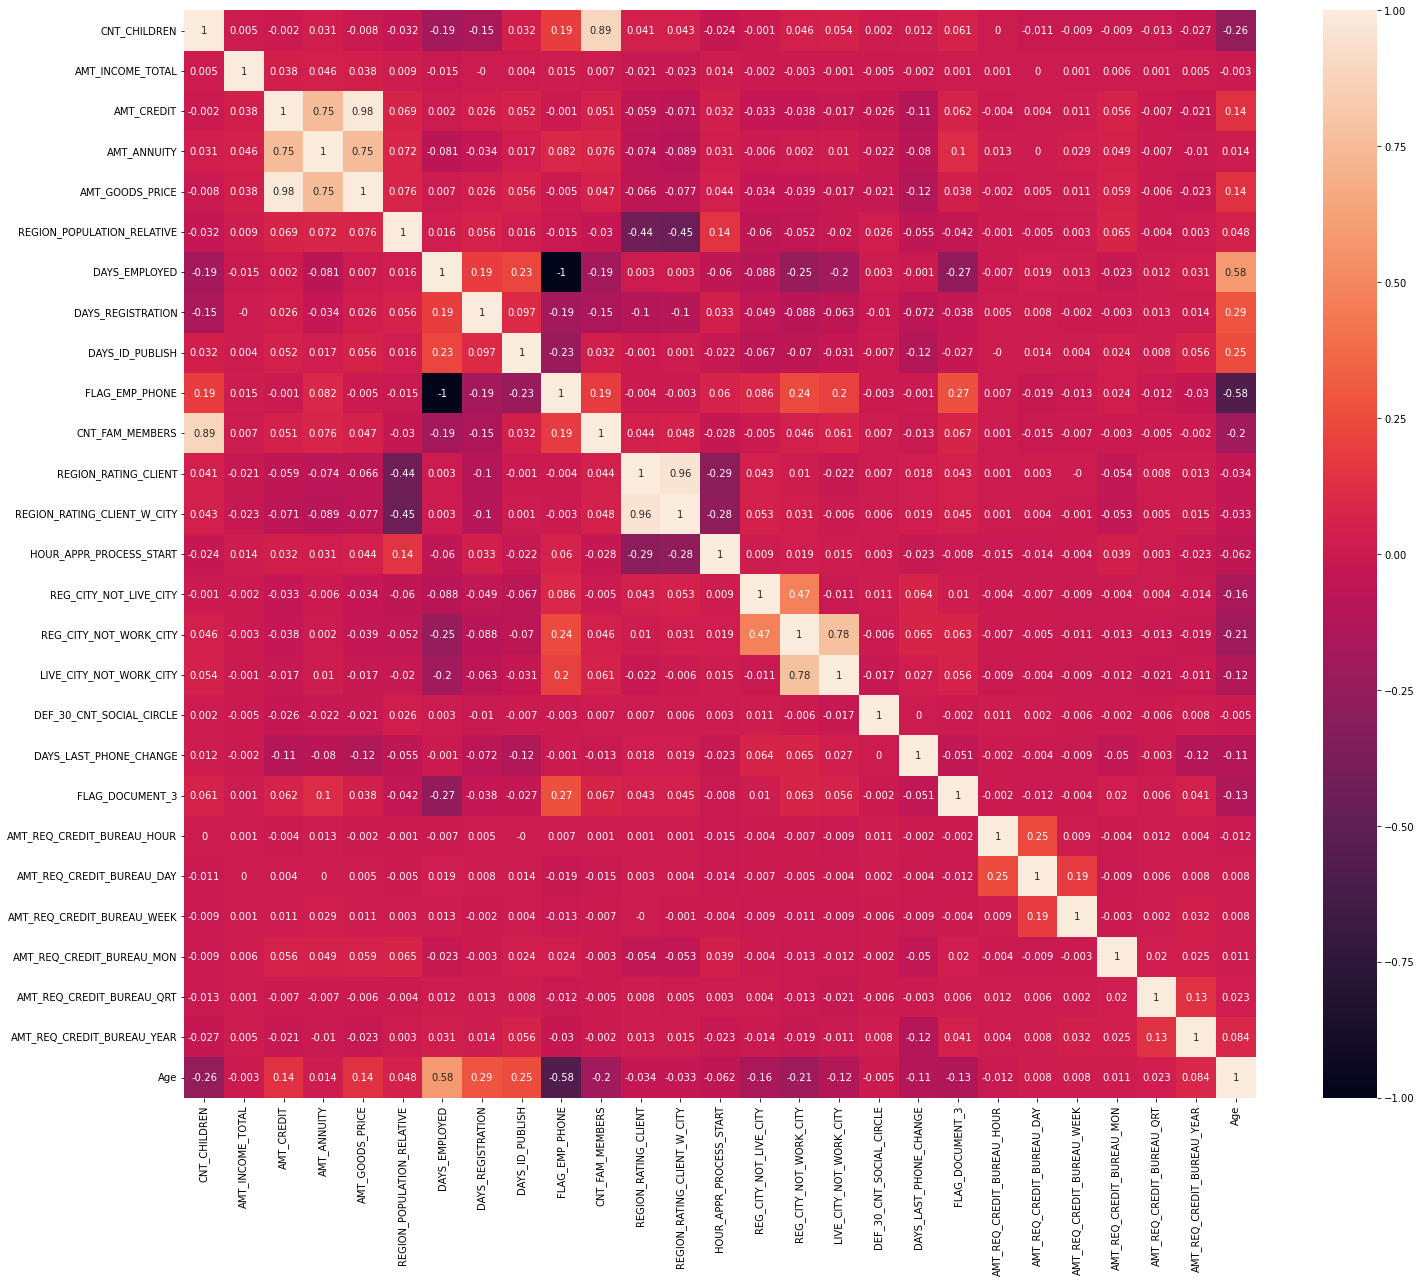

In [99]:
plt.figure(figsize=(24,20))
sns.heatmap(corr2,annot=True)

-Credit amount is highly correlated with amount of goods price which is same in both the cases.

-The loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to non-defaulters(0.77)

-We can also see that Age of non-defaulters have high correlation with number of days employed(0.62) when compared to defaulters(0.58).

-There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among non-defaulters.


#### Merged Analysis of Application Data and Previous Data

In [100]:
merged=pd.merge(app_df,prev_df,on='SK_ID_CURR',how='inner')
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Age_Category,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648.0,2120,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,25,20-40,200000-300000,400000-500000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,School,0.622246,<bound method NDFrame._add_numeric_operations....,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-60,200000-300000,Above 1000000,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,School,0.622246,<bound method NDFrame._add_numeric_operations....,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-60,200000-300000,Above 1000000,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,School,0.622246,<bound method NDFrame._add_numeric_operations....,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-60,200000-300000,Above 1000000,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,4260.0,2531,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,Government,0.555912,0.729567,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,40-60,0-100000,100000-200000,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [101]:
#shape of the merged data
merged.shape

(1413701, 67)

In [102]:
#Analysis of the Data types of the columns
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 67 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413701 non-null  float64 
 10  AMT_GOODS_PRICE_x            1413701 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [103]:
#Statistical Analysis
merged.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701688e+04,5.276522e+05,2.074985e-02,7.266347e+04,5.003233e+03,3.034563e+03,8.064393e-01,2.150501e+00,2.059638e+00,2.037603e+00,1.198433e+01,7.360538e-02,2.221481e-01,1.740601e-01,1.537008e-01,-1.084701e+03,7.385600e-01,5.484894e-03,6.028149e-03,3.410198e-02,2.664913e-01,3.196935e-01,2.691239e+00,4.421384e+01,1.922744e+06,1.484032e+04,1.752436e+05,1.963540e+05,2.006552e+05,8.803670e+02,3.149878e+02,1.517141e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395072e+04,3.531028e+05,1.334702e-02,1.433374e+05,3.551051e+03,1.507376e+03,3.950887e-01,9.006787e-01,4.957797e-01,4.886431e-01,3.232181e+00,2.611277e-01,4.156903e-01,3.791613e-01,4.654353e-01,7.999369e+02,4.394192e-01,7.702591e-02,1.001966e-01,2.012902e-01,9.268428e-01,8.781444e-01,2.157176e+00,1.190217e+01,5.327153e+05,1.316370e+04,2.936222e+05,3.194812e+05,2.820189e+05,7.835402e+02,7.695082e+03,1.299505e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.292000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.682100e+04,2.385000e+05,1.003200e-02,1.042000e+03,2.001000e+03,1.783000e+03,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.683000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.400000e+01,1.461346e+06,7.406055e+03,1.975050e+04,2.488050e+04,6.637500e+04,2.710000e+02,-1.000000e+00,1.000000e+01
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.492550e+04,4.500000e+05,1.885000e-02,2.401000e+03,4.508000e+03,3.330000e+03,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.011000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.300000e+01,1.922698e+06,1.125000e+04,7.087050e+04,8.059500e+04,1.123200e+05,5.820000e+02,4.000000e+00,1.200000e+01
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+05,8.079840e+05,3.454200e+04,6.795000e+05,2.866300e-02,6.313000e+03,7.510000e+03,4.319000e+03,1.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.960000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,5.400000e+01,2.384012e+06,1

In [104]:
defaulter=merged[merged['TARGET']==1]
non_defaulter=merged[merged['TARGET']==0]

Text(0.5, 1.0, 'Contract Status')

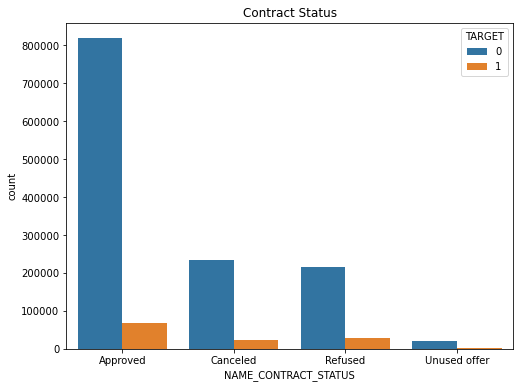

In [105]:
plt.figure(figsize=(8,6))
sns.countplot(data=merged, x='NAME_CONTRACT_STATUS',hue='TARGET')
plt.title('Contract Status')


Approved loan status is the highest among all loan application statuses, followed by Canceled loan status and we can also note that a majority of the clients for who have been canceled and refused a loan previously have actually payed the loan back in the current case 

Text(0.5, 1.0, 'Defaulters')

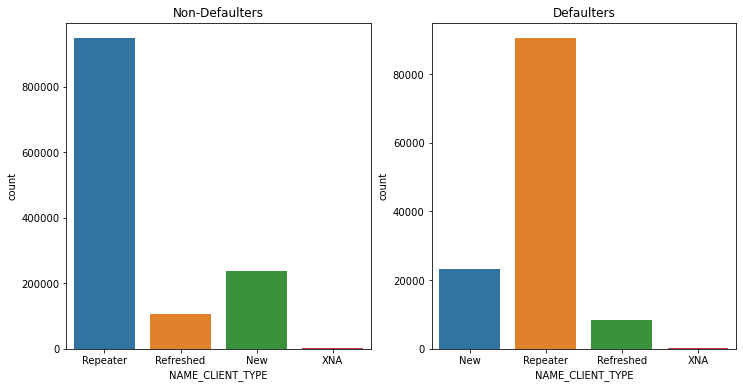

In [106]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x=non_defaulter['NAME_CLIENT_TYPE'])
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(x=defaulter['NAME_CLIENT_TYPE'])
plt.title('Defaulters')

The number of Repeater clients is very high in both the cases

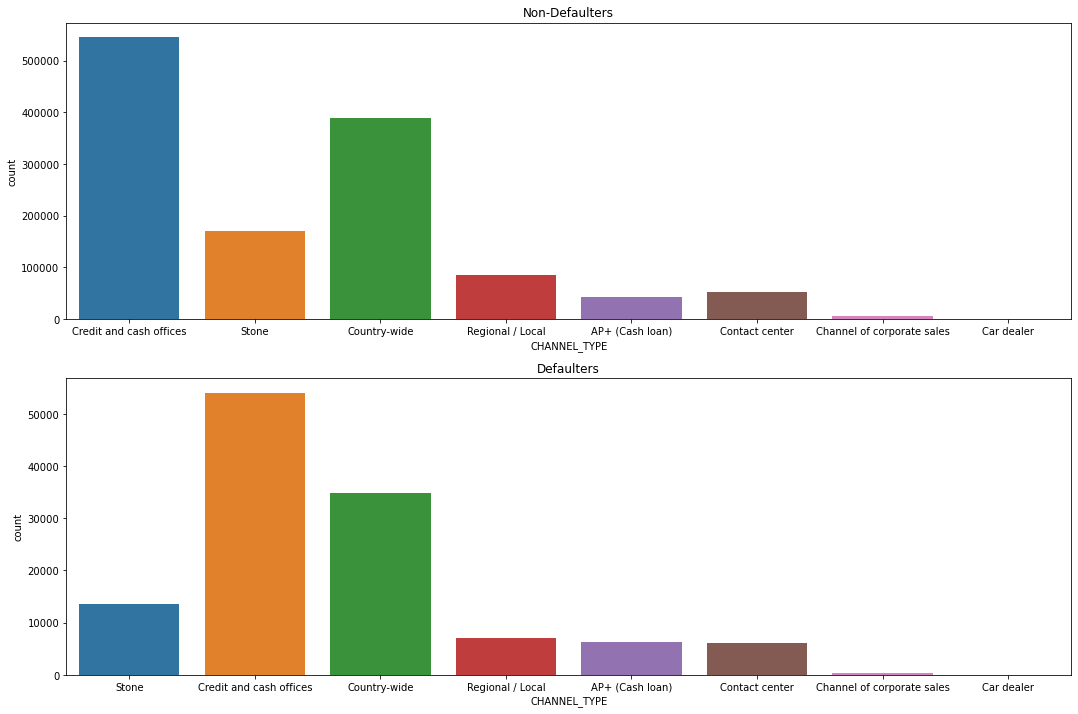

In [107]:
plt.figure(figsize=(18,12))
plt.subplot(2,1,1)
sns.countplot(x=non_defaulter['CHANNEL_TYPE'])
plt.title('Non-Defaulters')
plt.subplot(2,1,2)
sns.countplot(x=defaulter['CHANNEL_TYPE'])
plt.title('Defaulters')
plt.show()


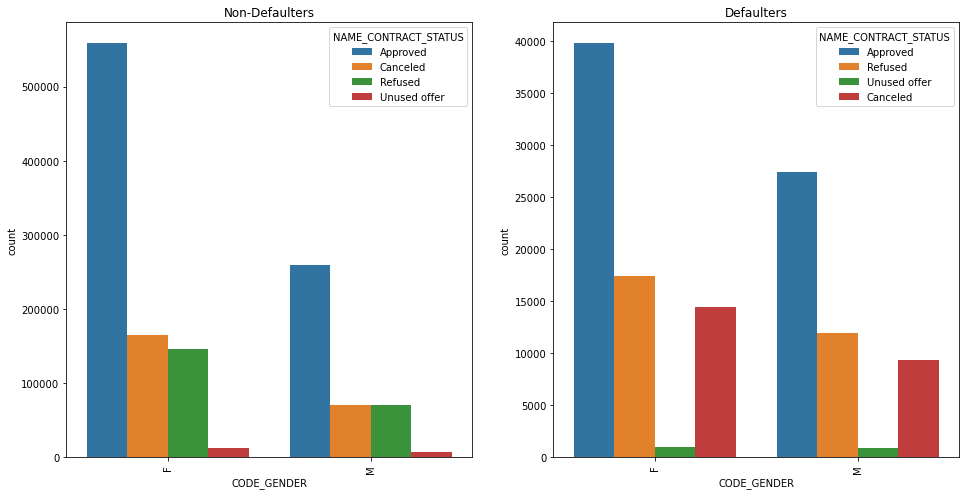

In [108]:
#Analysis of Gender type with respect to Contract status
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='CODE_GENDER',data=non_defaulter,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(x='CODE_GENDER',data=defaulter,hue='NAME_CONTRACT_STATUS')
plt.title('Defaulters')
plt.xticks(rotation='vertical')
plt.show()


we can observe that Female applicants for who the loan was approved previously are most likely to be a defaulter

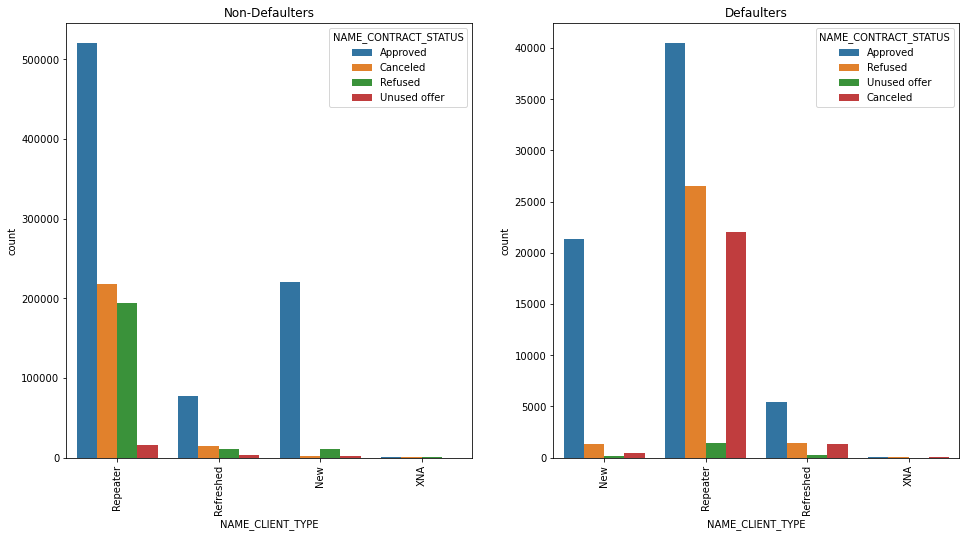

In [109]:
#Analysis of client type with respect to Contract status
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='NAME_CLIENT_TYPE',data=non_defaulter,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(x='NAME_CLIENT_TYPE',data=defaulter,hue='NAME_CONTRACT_STATUS')
plt.title('Defaulters')
plt.xticks(rotation='vertical')
plt.show()


We can observe that Repeating applicants for who the loan was approved previously are most likely to be a defaulter

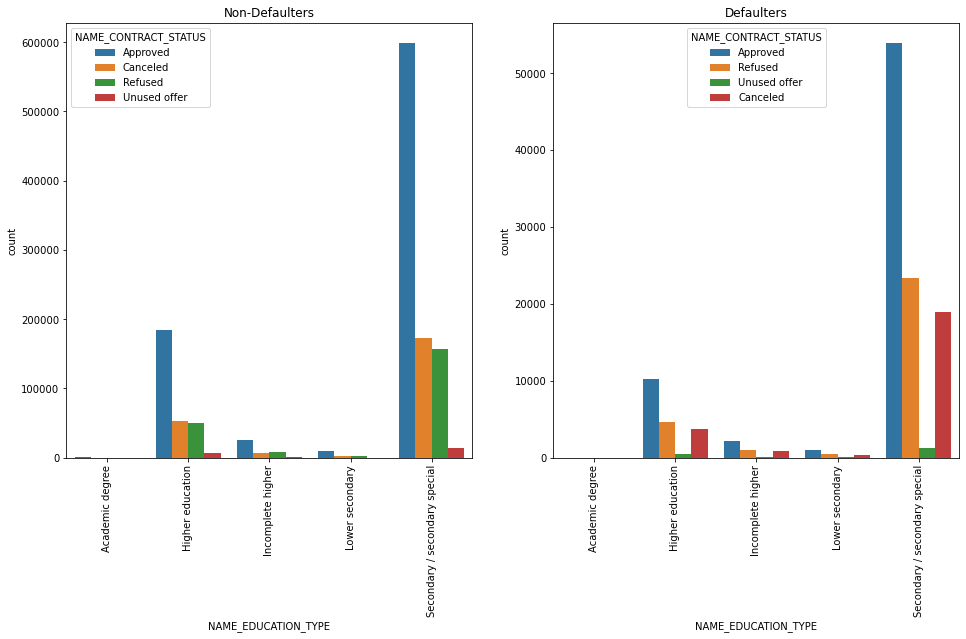

In [110]:
#Analysis of Education with respect to Contract Status
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='NAME_EDUCATION_TYPE',data=non_defaulter,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(x='NAME_EDUCATION_TYPE',data=defaulter,hue='NAME_CONTRACT_STATUS')
plt.title('Defaulters')
plt.xticks(rotation='vertical')
plt.show()


Most of the loan applications have been accepted for people who has Secondary level education

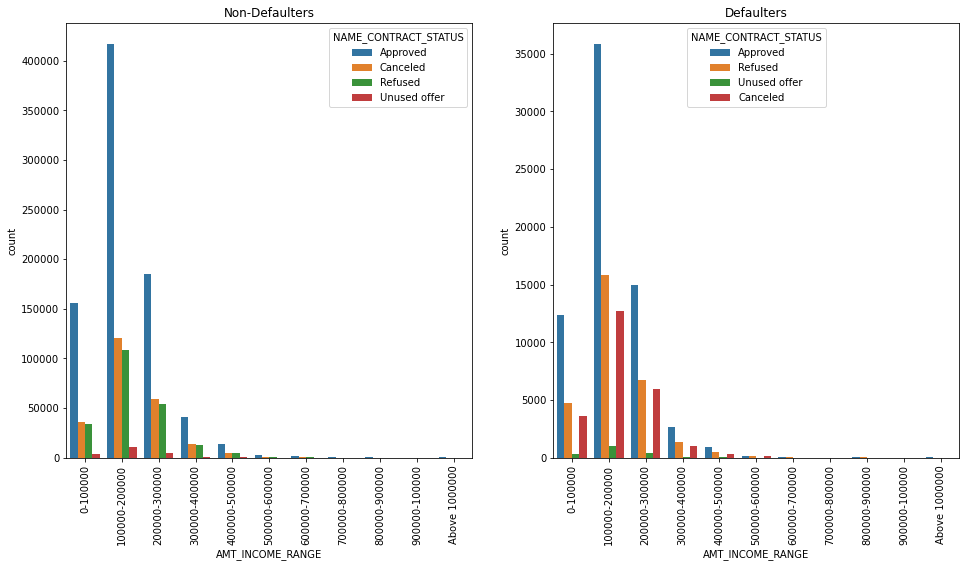

In [111]:
#Analysis of Income Range with respect to Contract Status
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='AMT_INCOME_RANGE',data=non_defaulter,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(x='AMT_INCOME_RANGE',data=defaulter,hue='NAME_CONTRACT_STATUS')
plt.title('Defaulters')
plt.xticks(rotation='vertical')
plt.show()

Most of the loan applications have been accepted for people who income between 100k-200k

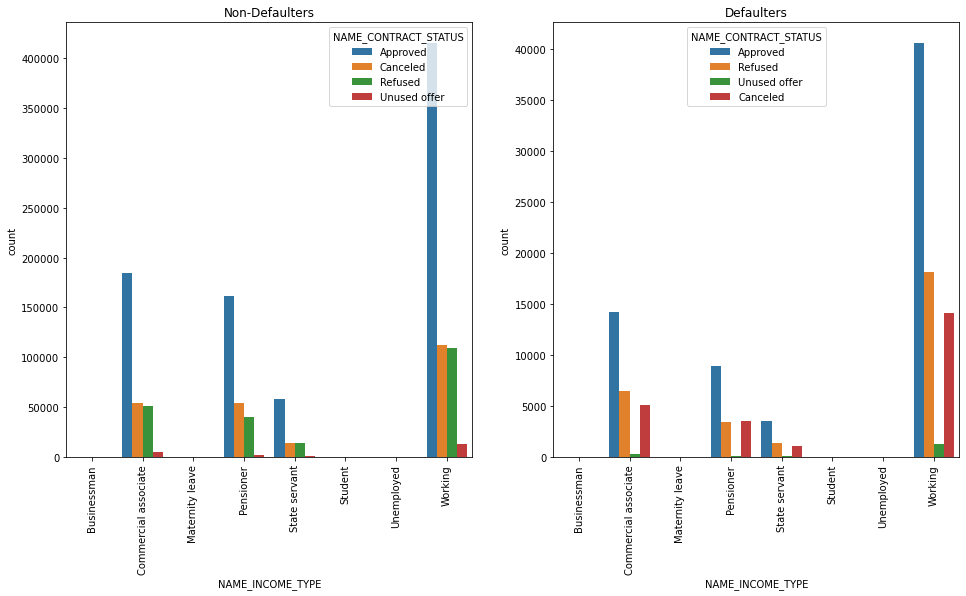

In [112]:
#Analysis of Income Type with respect to Contract Status
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='NAME_INCOME_TYPE',data=non_defaulter,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(x='NAME_INCOME_TYPE',data=defaulter,hue='NAME_CONTRACT_STATUS')
plt.title('Defaulters')
plt.xticks(rotation='vertical')
plt.show()

Text(0.5, 1.0, 'Defaulter')

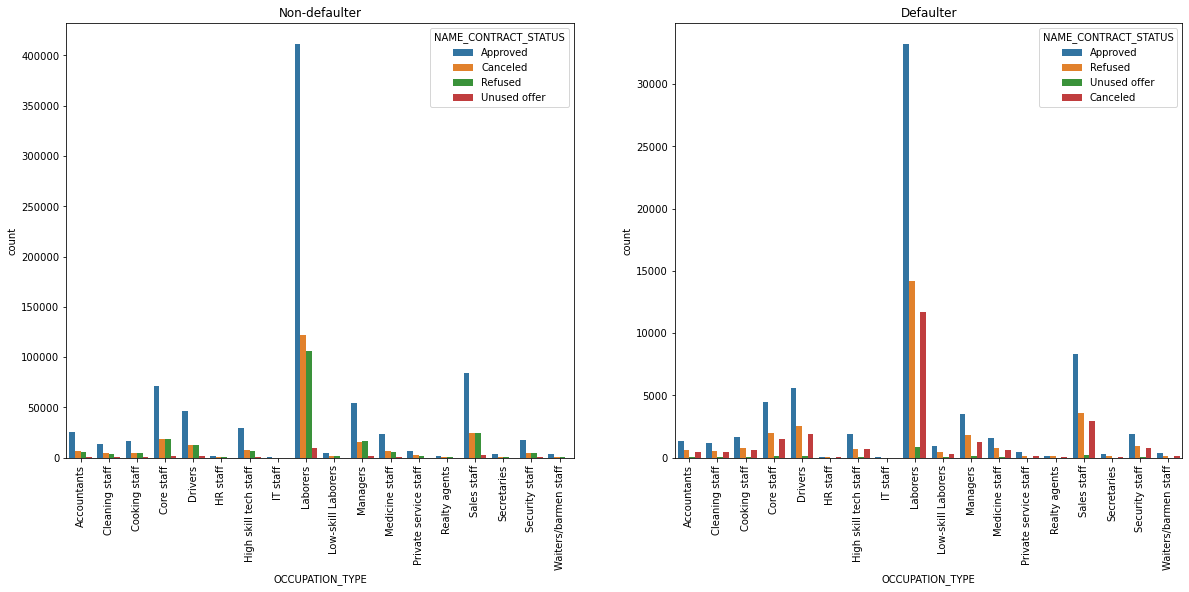

In [113]:
#Analysis of Occupation type with contract status
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
p = sns.countplot(x = "OCCUPATION_TYPE", hue= 'NAME_CONTRACT_STATUS', data = non_defaulter)
plt.xticks(rotation='vertical')
plt.title("Non-defaulter")
plt.subplot(1,2,2)
p = sns.countplot(x = "OCCUPATION_TYPE", hue= 'NAME_CONTRACT_STATUS', data = defaulter)
plt.xticks(rotation='vertical')
plt.title("Defaulter")

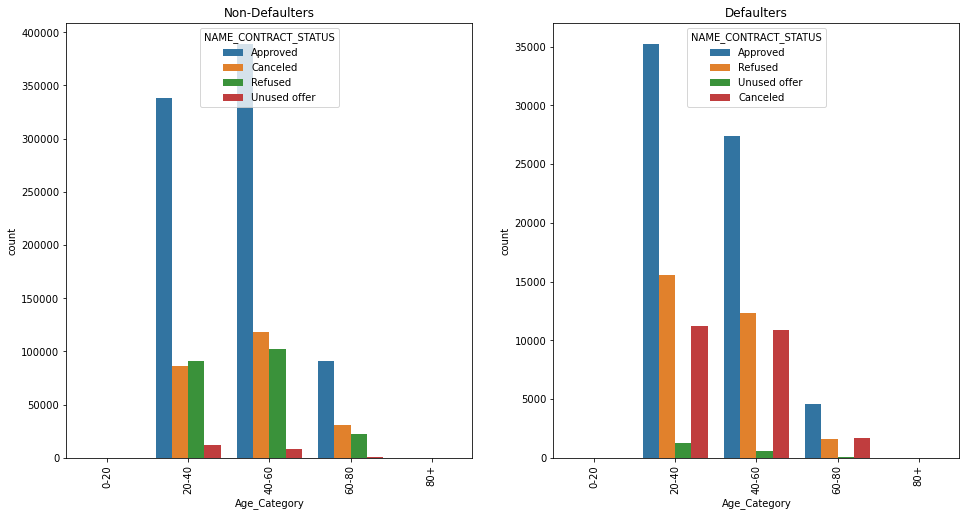

In [114]:
#Analysis of Age Range with respect to Contract Status
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='Age_Category',data=non_defaulter,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation='vertical')
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(x='Age_Category',data=defaulter,hue='NAME_CONTRACT_STATUS')
plt.title('Defaulters')
plt.xticks(rotation='vertical')
plt.show()

Most loan applications have been approved for people between the ages of 20-60

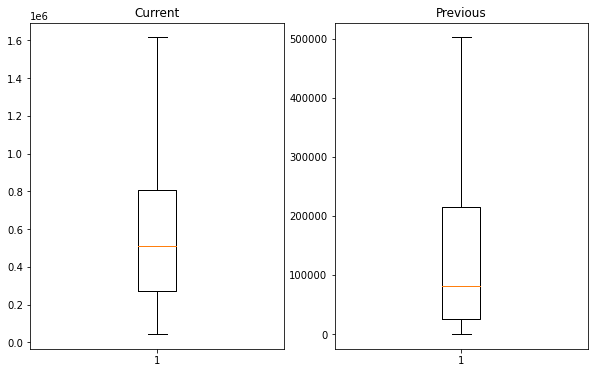

In [115]:
#Analysis of current credit amount vs previous credit amount
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.boxplot('AMT_CREDIT_x',data=merged,showfliers=False)
plt.title('Current')
plt.subplot(1,2,2)
plt.boxplot('AMT_CREDIT_y',data=merged,showfliers=False)
plt.title('Previous')
plt.show()

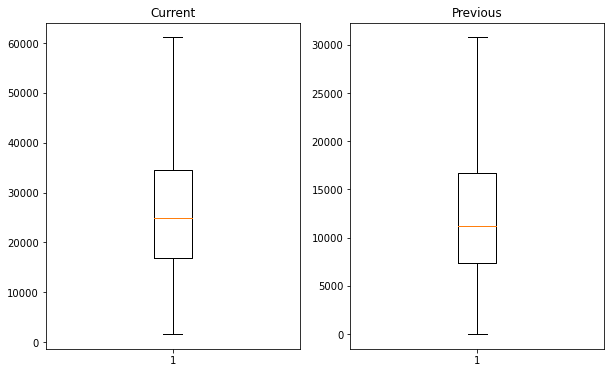

In [116]:
#Analysis of current annuity vs previous annuity
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.boxplot('AMT_ANNUITY_x',data=merged,showfliers=False)
plt.title('Current')
plt.subplot(1,2,2)
plt.boxplot('AMT_ANNUITY_y',data=merged,showfliers=False)
plt.title('Previous')
plt.show()

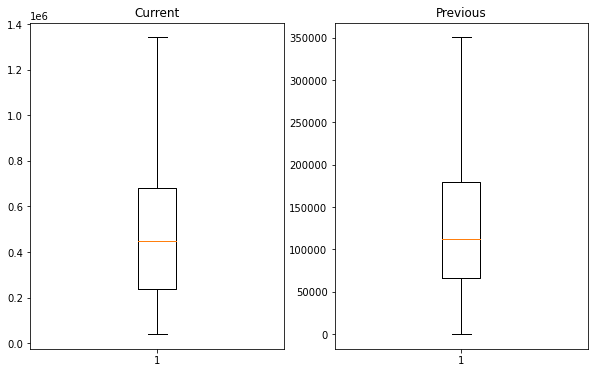

In [117]:
#Analysis of current Goods price vs previous Goods price
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.boxplot('AMT_GOODS_PRICE_x',data=merged,showfliers=False)
plt.title('Current')
plt.subplot(1,2,2)
plt.boxplot('AMT_GOODS_PRICE_y',data=merged,showfliers=False)
plt.title('Previous')
plt.show()

Their credit amount has been increased and the result annuity amount has also increased. The goods price is increased drastically for almost all the items. 

In [118]:
#Loan purpose variable
prev_df['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

Even though Loan purpose column can be very vital for better analysis, more than 95% of the values seems to be missing (XAP or XNA)
Dropping all those missing data would result in huge data loss and imputation may lead to inaccurate analysis.

### Case study final conclusions
The Imbalance Ratio was found to be too high (i.e) more than 90% were Non-Defaulters and only less than 10% were defaulters.

The Gender type Female tend to take loan more than the type Male.

Majority of the loan takers are between the ages of 20-60.

Majority of the loan takers are married,have 0-1 number of children and either House/Apt or with Parents.

People prefer Cash loan over revolving loan.



#### Factors to Identify Non-Defaulters:
 
Academic degree holders have applied for a large credit amount and are mostly paid the loan back on time.

People between the ages of 40 to 60 are safer to provide a loan as they have low probablilty of defaulting

Student and Businessmen have no defaults

Even though females have taken the most number of loans,they have mostly repayed the loan amount back.

Married clients are safe to give the loan as they are more likely to repay on time.

People who do not own a car and who owns realty are more likely to repay on time.









#### Factors to Identify Defaulters:

Defaulters were found to mostly have secondary/special level of educaltion.

Avoid young people who are in age group of 20 to 40 as they have higher probability of defaulting

People who get loan for 300-600k tend to default more than others 

The Default rate of Males is higher than that of Females

Single and not married clients are more likely to default.

